In [2]:
%pylab inline
import platform
print(platform.python_version())
import pandas as pd
import statsmodels.api as sm
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
plt.style.use('seaborn-white')
#print(plt.style.available)

Populating the interactive namespace from numpy and matplotlib
3.6.0


In [3]:
#load data from Claire's paper - OTUs picked together at 97%
combined_data = pd.DataFrame.from_csv('pipeline_results/all_v4_mincount20.otu_table.97.denovo.rdp_assigned',sep='\t',header=0,index_col=0)
combined_metadata = pd.DataFrame.from_csv('pipeline_results/all_metadata.txt',sep='\t',header=0,index_col=0,encoding='ISO-8859-1')

/Users/seanmgibbons/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (2,3,4,9,10,11,12,14,16,17,21,23,25,26,27,30,32,33,35,36,37,38,39,40,41,44,45,48,49,59,60,61,62,63,64,68,69,72,76,79,80,81,82,83,84,85,86,89,90,95,96,97,102,103,104,105,106,107,108,109,110,111,114,115,119,121,123,126,129,134,135,136,138,139,144,147,148,149,152,154,166,167,168,169,170,171,172,176,178,179,181,182,185,187,188,189,190,192,194,195,198,199,200,204,205,207,208,211,213,214,216,217,218,219,220,222,224,225,226,229,230,232,233,234,237,239,241,246,247,248,249,250,251,253,254,255,257,259,260,263,264,265,266,267,269,271,272,274,275,276,277,279) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
combined_data_T = combined_data.transpose()
#print(combined_data_T)
combined_metadata_filt = combined_metadata.transpose()[list(set(combined_data.columns).intersection(combined_metadata.index))].transpose()
combined_data_filt = combined_data[list(set(combined_data.columns).intersection(combined_metadata.index))]
print(len(combined_metadata_filt.dataset_id_code))
#print((combined_data_filt.shape))

#print(combined_data_filt)

2248


In [5]:
combined_data['sum'] = combined_data.sum(axis=1)
print(combined_data['sum'].sort_values().iloc[0]/combined_data['sum'].sum())
combined_data = combined_data.sort_values('sum',ascending=False)
combined_data = combined_data.transpose().drop('sum').transpose()
#print(combined_metadata)
#print(len(nmds_batch[:, 0]))


1.12344093151e-07


In [6]:
##extract data for CRC studies

crc_studies_sample_list = []
for i in range(combined_metadata_filt.shape[0]):
    if 'crc' in combined_metadata_filt.index[i]:
        crc_studies_sample_list.append(combined_metadata_filt.index[i])
#print(healthy_list)
combined_data_crc_studies = combined_data_filt[list(crc_studies_sample_list)]
combined_metadata_crc_studies = combined_metadata_filt.transpose()[list(crc_studies_sample_list)].transpose()

#print(combined_data_crc_studies.shape)

print(combined_data_crc_studies.shape)
combined_data_crc_studies_combatinput = combined_data_crc_studies.copy().div(combined_data_crc_studies.sum(axis=0), axis=1).fillna(0.0).replace(0.0,(np.min(1/combined_data_crc_studies.max()*0.5)))
combined_data_crc_studies_norm = combined_data_crc_studies.div(combined_data_crc_studies.sum(axis=0), axis=1).fillna(0.0)

##grab only healthy samples

crc_studies_healthy_list = []
for i in range(combined_metadata_crc_studies.shape[0]):
    if combined_metadata_crc_studies['DiseaseState'][i] == 'H':
        crc_studies_healthy_list.append(combined_metadata_crc_studies.index[i])
#print(healthy_list)
combined_data_crc_studies_healthy_combatinput = combined_data_crc_studies_combatinput[list(crc_studies_healthy_list)]
combined_metadata_crc_studies_healthy = combined_metadata_filt.transpose()[list(crc_studies_healthy_list)].transpose()
print(combined_data_crc_studies_healthy_combatinput.shape)

(5585, 707)
(5585, 277)


In [7]:
#print(combined_data_crc_studies_filt)

In [8]:
import combat
dat = combined_data_crc_studies_healthy_combatinput.transpose().sort_index().transpose()
#print(dat.shape)
#print(0.5*np.min(1/dat.max()))
#dat = dat.div(dat.sum(axis=0), axis=1).fillna(0.0).replace(0.0,(np.min(1/dat.max())))
#dat = dat.fillna(0.0).replace(0.0,(np.min(dat.min())/2))
dat = dat.loc[:, dat.sum(axis=0) > 0]
#dat = dat.loc[dat.sum(axis=1) > 0.01, :]
#dat = dat.apply(sp.stats.zscore,axis=1).fillna(0.0) + 1.5
dat = dat.apply(np.log)
#print(dat)

#print(dat)
#dat.plot(kind='hist',legend=False)
#plt.show()
batch = []

for i in range(dat.shape[1]):
    if 'baxter' in dat.columns[i]:
        batch.append('baxter')
    if 'zackular' in dat.columns[i]:
        batch.append('zackular')
    if 'zeller' in dat.columns[i]:
        batch.append('zeller')

norm_dat = combat.combat(dat, batch)

dat = dat.apply(np.exp)
norm_dat = norm_dat.apply(np.exp)


found 3 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
/Users/seanmgibbons/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
Fitting L/S model and finding priors
Finding parametric adjustments
/Users/seanmgibbons/Dropbox (MIT)/meta-analysis_data/combat.py:157: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  sum2 = ((sdat - np.dot(g_new.reshape((g_new.shape[0], 1)), np.ones((1, sdat.shape[1])))) ** 2).sum(axis=1)


Adjusting data


In [8]:
#print(dat)

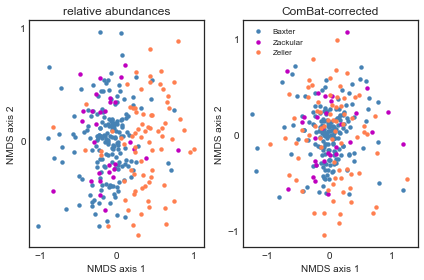

In [9]:
#build data for nmds plot colored by study id - crc
from sklearn import manifold
from sklearn.metrics.pairwise import pairwise_distances
seed = np.random.RandomState(seed=3)
dist_healthy = pairwise_distances(dat.transpose(),metric='braycurtis')
mds_healthy = manifold.MDS(n_components=2, max_iter=500, eps=1e-6, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos_healthy = mds_healthy.fit(dist_healthy).embedding_
nmds_healthy = manifold.MDS(n_components=2, metric=False, max_iter=500, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
nmds_batch_healthy = nmds_healthy.fit_transform(dist_healthy, init=pos_healthy)
seed = np.random.RandomState(seed=3)
dist_healthy_norm = pairwise_distances(norm_dat.transpose(),metric='braycurtis')
mds_healthy_norm = manifold.MDS(n_components=2, max_iter=500, eps=1e-6, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos_healthy_norm = mds_healthy_norm.fit(dist_healthy_norm).embedding_
nmds_healthy_norm = manifold.MDS(n_components=2, metric=False, max_iter=500, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
nmds_batch_healthy_norm = nmds_healthy_norm.fit_transform(dist_healthy_norm, init=pos_healthy_norm)

from collections import OrderedDict
#plt.scatter(nmds_batch[:, 0], nmds_batch[:, 1],c=combined_metadata_filt.dataset_id_code, 
#            cmap=plt.cm.Set2,s=10, lw=0, label='NMDS')
#plt.colorbar()
#plt.title('NMDS - color by study')
#plt.savefig('nmds_colorbystudy.png',dpi=300)
#plt.show()
#c=combined_metadata.dataset_id_code, 
#cmap=plt.cm.prism
combined_metadata_crc_studies_healthy = combined_metadata_crc_studies_healthy.sort_index()
#draw nmds study id plot

fig, (ax1,ax2) = plt.subplots(1,2)

for i in range(len(combined_metadata_crc_studies_healthy.color)):
    if combined_metadata_crc_studies_healthy.color[i] == 'coral':
        ax1.scatter(nmds_batch_healthy[i, 0], nmds_batch_healthy[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zeller')
    if combined_metadata_crc_studies_healthy.color[i] == 'm':
        ax1.scatter(nmds_batch_healthy[i, 0], nmds_batch_healthy[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zackular')
    if combined_metadata_crc_studies_healthy.color[i] == 'steelblue':
        ax1.scatter(nmds_batch_healthy[i, 0], nmds_batch_healthy[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Baxter')

for i in range(len(combined_metadata_crc_studies_healthy.color)):
    if combined_metadata_crc_studies_healthy.color[i] == 'coral':
        ax2.scatter(nmds_batch_healthy_norm[i, 0], nmds_batch_healthy_norm[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zeller')
    if combined_metadata_crc_studies_healthy.color[i] == 'm':
        ax2.scatter(nmds_batch_healthy_norm[i, 0], nmds_batch_healthy_norm[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zackular')
    if combined_metadata_crc_studies_healthy.color[i] == 'steelblue':
        ax2.scatter(nmds_batch_healthy_norm[i, 0], nmds_batch_healthy_norm[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Baxter')        
#ax1.set_ylim([-0.7,1.1])
ax1.set_xlabel('NMDS axis 1')
ax1.set_ylabel('NMDS axis 2')
ax2.set_xlabel('NMDS axis 1')
ax2.set_ylabel('NMDS axis 2')
ax1.set_title('relative abundances')
ax2.set_title('ComBat-corrected')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),prop={'size':8},loc=2)
#plt.title('NMDS - color by study (healthy only)')
ax2.locator_params(nbins=4, axis='x')
ax1.locator_params(nbins=4, axis='x')
ax2.locator_params(nbins=4, axis='y')
ax1.locator_params(nbins=4, axis='y')
plt.tight_layout()
#plt.show()
plt.savefig('nmds_colorbystudy_healthy_crc_combat.pdf',dpi=300,format='pdf')

In [10]:
import skbio as sk
from skbio import DistanceMatrix
dm_raw = DistanceMatrix(dist_healthy,combined_metadata_crc_studies_healthy.index)
#print(pd.DataFrame(dist_healthy))
permanova = sk.stats.distance.permanova(dm_raw,combined_metadata_crc_studies_healthy.color,permutations=10000)

print(permanova)

dm_combat = DistanceMatrix(dist_healthy_norm,combined_metadata_crc_studies_healthy.index)
#print(pd.DataFrame(dist_healthy))
permanova_combat = sk.stats.distance.permanova(dm_combat,combined_metadata_crc_studies_healthy.color,permutations=10000)

print(permanova_combat)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     277
number of groups                  3
test statistic              9.03604
p-value                   9.999e-05
number of permutations        10000
Name: PERMANOVA results, dtype: object
method name                PERMANOVA
test statistic name         pseudo-F
sample size                      277
number of groups                   3
test statistic               1.50031
p-value                   0.00759924
number of permutations         10000
Name: PERMANOVA results, dtype: object


In [11]:
print(combined_metadata_crc_studies_healthy.color)

crcbaxter--2003650    steelblue
crcbaxter--2005650    steelblue
crcbaxter--2007660    steelblue
crcbaxter--2013660    steelblue
crcbaxter--2015650    steelblue
crcbaxter--2019651    steelblue
crcbaxter--2023680    steelblue
crcbaxter--2027653    steelblue
crcbaxter--2033650    steelblue
crcbaxter--2039650    steelblue
crcbaxter--2043650    steelblue
crcbaxter--2045653    steelblue
crcbaxter--2057650    steelblue
crcbaxter--2061650    steelblue
crcbaxter--2063650    steelblue
crcbaxter--2071650    steelblue
crcbaxter--2073650    steelblue
crcbaxter--2077653    steelblue
crcbaxter--2081660    steelblue
crcbaxter--2083650    steelblue
crcbaxter--2085653    steelblue
crcbaxter--2087650    steelblue
crcbaxter--2093650    steelblue
crcbaxter--2097653    steelblue
crcbaxter--2103650    steelblue
crcbaxter--2105652    steelblue
crcbaxter--2107650    steelblue
crcbaxter--2109653    steelblue
crcbaxter--2115650    steelblue
crcbaxter--2119650    steelblue
                        ...    
crczelle

In [11]:
#filter data for CRC 
crc_baxter_list = []
h_baxter_list = []
for i in range(combined_metadata.shape[0]):
    if 'crcbaxter' in combined_metadata.index[i] and combined_metadata['DiseaseState'][i] == 'H':
        h_baxter_list.append(combined_metadata.index[i])
    elif 'crcbaxter' in combined_metadata.index[i] and combined_metadata['DiseaseState'][i] == 'CRC':
        crc_baxter_list.append(combined_metadata.index[i])

crc_zeller_list = []
h_zeller_list = []
for i in range(combined_metadata.shape[0]):
    if 'crczeller' in combined_metadata.index[i] and combined_metadata['DiseaseState'][i] == 'H' and combined_metadata.index[i] in combined_data_T.index:
        h_zeller_list.append(combined_metadata.index[i])
    elif 'crczeller' in combined_metadata.index[i] and combined_metadata['DiseaseState'][i] == 'CRC' and combined_metadata.index[i] in combined_data_T.index:
        crc_zeller_list.append(combined_metadata.index[i])

crc_zackular_list = []
h_zackular_list = []
for i in range(combined_metadata.shape[0]):
    if 'crczackular' in combined_metadata.index[i] and combined_metadata['DiseaseState'][i] == 'H':
        h_zackular_list.append(combined_metadata.index[i])
    elif 'crczackular' in combined_metadata.index[i] and combined_metadata['DiseaseState'][i] == 'CRC':
        crc_zackular_list.append(combined_metadata.index[i])
                
baxter_crc_data_raw = combined_data_crc_studies_norm[list(crc_baxter_list)]
baxter_h_data_raw = combined_data_crc_studies_norm[list(h_baxter_list)]
zeller_crc_data_raw = combined_data_crc_studies_norm[list(crc_zeller_list)]
zeller_h_data_raw = combined_data_crc_studies_norm[list(h_zeller_list)]
zackular_crc_data_raw = combined_data_crc_studies_norm[list(crc_zackular_list)]
zackular_h_data_raw = combined_data_crc_studies_norm[list(h_zackular_list)]

In [12]:
zeller_otus = []
for i in range(zeller_h_data_raw.shape[0]):
    if zeller_h_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_h_data_raw.shape[1]) >= 1/3.0 or zeller_crc_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_crc_data_raw.shape[1]) >= 1/3.0:
        zeller_otus.append(zeller_h_data_raw.index[i])
baxter_otus = []
for i in range(baxter_h_data_raw.shape[0]):
    if baxter_h_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_h_data_raw.shape[1]) >= 1/3.0 or baxter_crc_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_crc_data_raw.shape[1]) >= 1/3.0:
        baxter_otus.append(baxter_h_data_raw.index[i])
               
zackular_otus = []
for i in range(zackular_h_data_raw.shape[0]):
    if zackular_h_data_raw.iloc[i,:].astype(bool).sum()/float(zackular_h_data_raw.shape[1]) >= 1/3.0 or zackular_crc_data_raw.iloc[i,:].astype(bool).sum()/float(zackular_crc_data_raw.shape[1]) >= 1/3.0:
        zackular_otus.append(zackular_h_data_raw.index[i])

all_otus = list(set(set(baxter_otus) | set(zeller_otus)))       
zeller_h_data_raw = zeller_h_data_raw.transpose()[all_otus].transpose()
baxter_h_data_raw = baxter_h_data_raw.transpose()[all_otus].transpose()
zackular_h_data_raw = zackular_h_data_raw.transpose()[all_otus].transpose()

zeller_crc_data_raw = zeller_crc_data_raw.transpose()[all_otus].transpose()
baxter_crc_data_raw = baxter_crc_data_raw.transpose()[all_otus].transpose()
zackular_crc_data_raw = zackular_crc_data_raw.transpose()[all_otus].transpose()


In [13]:
print(len(all_otus))
#print(len(baxter_otus))
#print(len(zeller_otus))


1021


In [14]:
#create combat-corrected results for case and controls
combined_data_crc_all = combined_data_crc_studies_combatinput.copy()[list(crc_baxter_list)+list(h_baxter_list)+list(crc_zeller_list)+list(h_zeller_list)]

dat_comb = combined_data_crc_all.transpose().sort_index().transpose()
#dat_comb = dat_comb.div(dat_comb.sum(axis=0), axis=1).fillna(0.0).replace(0.0,(np.min(1/dat_comb.max())))
dat_comb = dat_comb.loc[:, dat_comb.sum(axis=0) > 0.0]
#dat_comb = dat_comb.loc[dat_comb.sum(axis=1) > 0.005, :]

dat_comb = dat_comb.apply(np.log)
dat_comb.to_csv('log_corrected_crc_OTU_data_for_limma.txt',sep='\t')
#print(dat_comb)
batch_comb = []

for i in range(dat_comb.shape[1]):
    if 'baxter' in dat_comb.columns[i]:
        batch_comb.append('baxter')
#    if 'zackular' in dat_comb.columns[i]:
#        batch_comb.append('zackular')
    if 'zeller' in dat_comb.columns[i]:
        batch_comb.append('zeller')

pd.Series(batch_comb).to_csv('log_corrected_crc_OTU_data_for_limma_batches.txt',sep='\t',index=False)
combined_data_combat = combat.combat(dat_comb, batch_comb)
#print(combined_data_combat)
dat_comb = dat_comb.apply(np.exp)
combined_data_combat = combined_data_combat.apply(np.exp)


found 2 batches
found 0 numerical covariates...
found 0 categorical variables:	
Standardizing Data across genes.
/Users/seanmgibbons/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
Fitting L/S model and finding priors
Finding parametric adjustments
/Users/seanmgibbons/Dropbox (MIT)/meta-analysis_data/combat.py:157: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  sum2 = ((sdat - np.dot(g_new.reshape((g_new.shape[0], 1)), np.ones((1, sdat.shape[1])))) ** 2).sum(axis=1)


Adjusting data


In [15]:
##Import linear correction

combined_data_limma = pd.DataFrame.from_csv('log_corrected_crc_OTU_data_limma_corrected.txt',sep='\t',header=0,index_col=0)
combined_data_limma = combined_data_limma.apply(np.exp)

baxter_crc_data_limma = combined_data_limma[list(crc_baxter_list)]
baxter_h_data_limma = combined_data_limma[list(h_baxter_list)]
zeller_crc_data_limma = combined_data_limma[list(crc_zeller_list)]
zeller_h_data_limma = combined_data_limma[list(h_zeller_list)]
#zackular_crc_data_limma = combined_data_limma[list(crc_zackular_list)]
#zackular_h_data_limma = combined_data_limma[list(h_zackular_list)]

zeller_h_data_limma = zeller_h_data_limma.transpose()[all_otus].transpose()
baxter_h_data_limma = baxter_h_data_limma.transpose()[all_otus].transpose()
zeller_crc_data_limma = zeller_crc_data_limma.transpose()[all_otus].transpose()
baxter_crc_data_limma = baxter_crc_data_limma.transpose()[all_otus].transpose()

In [16]:
#filter data for CRC - combat corrected
      

baxter_crc_data_combat = combined_data_combat[list(crc_baxter_list)]
baxter_h_data_combat = combined_data_combat[list(h_baxter_list)]
zeller_crc_data_combat = combined_data_combat[list(crc_zeller_list)]
zeller_h_data_combat = combined_data_combat[list(h_zeller_list)]
#zackular_crc_data_combat = combined_data_combat[list(crc_zackular_list)]
#zackular_h_data_combat = combined_data_combat[list(h_zackular_list)]

zeller_h_data_combat = zeller_h_data_combat.transpose()[all_otus].transpose()
baxter_h_data_combat = baxter_h_data_combat.transpose()[all_otus].transpose()
zeller_crc_data_combat = zeller_crc_data_combat.transpose()[all_otus].transpose()
baxter_crc_data_combat = baxter_crc_data_combat.transpose()[all_otus].transpose()

In [17]:
print(len(h_zackular_list))
print(len(h_baxter_list))
print(len(h_zeller_list))

print(len(crc_zackular_list))
print(len(crc_baxter_list))
print(len(crc_zeller_list))

30
172
75
30
120
41


In [18]:
print(zeller_h_data_raw.shape)
print(zeller_crc_data_raw.shape)

print(baxter_h_data_raw.shape)
print(baxter_crc_data_raw.shape)

shared_otus = set(zeller_h_data_raw.index).intersection(set(baxter_h_data_raw.index))
print(len(shared_otus))

(1021, 75)
(1021, 41)
(1021, 172)
(1021, 120)
1021


In [19]:
##alternative code for percentile calculation

#zeller_crc_df = zeller_crc_data.copy()
#zeller_h_df = zeller_h_data.copy()

#zeller_crc_norm_x = np.array(
#    [
#        [sp.stats.percentileofscore(zeller_h_df.iloc[i, :], zeller_crc_df.iloc[i, j], kind='mean')
#            for j in range(zeller_crc_df.shape[1])]
#    for i in range(zeller_crc_df.shape[0])
#    ])

#zeller_h_norm_x = np.array(
#    [
#        [sp.stats.percentileofscore(zeller_h_df.iloc[i, :], zeller_h_df.iloc[i, j], kind='mean')
#            for j in range(zeller_h_df.shape[1])]
#    for i in range(zeller_h_df.shape[0])
#    ])

## Put back into dataframe and write to file
#zeller_crc_data_percentiles = pd.DataFrame(data=zeller_crc_norm_x, columns=zeller_crc_df.columns, index=zeller_crc_df.index)
#zeller_h_data_percentiles = pd.DataFrame(data=zeller_h_norm_x, columns=zeller_h_df.columns, index=zeller_h_df.index)


In [20]:
print(np.min(np.array(zeller_h_data_raw.iloc[i,:])[np.nonzero(np.array(zeller_h_data_raw.iloc[i,:]))]))



3.24361494398e-06


In [21]:
#replace zeros with random number between 0 and 10^-9
zeller_crc_data_raw_nozero = zeller_crc_data_raw.copy()
zeller_crc_data_raw_nozero = zeller_crc_data_raw_nozero.replace(0.0,np.nan)
zeller_crc_data_raw_nozero_rand = pd.DataFrame(np.random.uniform(0.0,10**-9,size=(zeller_crc_data_raw_nozero.shape[0],zeller_crc_data_raw_nozero.shape[1])),index=zeller_crc_data_raw_nozero.index,columns=zeller_crc_data_raw_nozero.columns)
zeller_crc_data_raw_nozero[pd.isnull(zeller_crc_data_raw_nozero)] = zeller_crc_data_raw_nozero_rand[pd.isnull(zeller_crc_data_raw_nozero)]

zeller_h_data_raw_nozero = zeller_h_data_raw.copy()
zeller_h_data_raw_nozero = zeller_h_data_raw_nozero.replace(0.0,np.nan)
zeller_h_data_raw_nozero_rand = pd.DataFrame(np.random.uniform(0.0,10**-9,size=(zeller_h_data_raw_nozero.shape[0],zeller_h_data_raw_nozero.shape[1])),index=zeller_h_data_raw_nozero.index,columns=zeller_h_data_raw_nozero.columns)
zeller_h_data_raw_nozero[pd.isnull(zeller_h_data_raw_nozero)] = zeller_h_data_raw_nozero_rand[pd.isnull(zeller_h_data_raw_nozero)]

baxter_crc_data_raw_nozero = baxter_crc_data_raw.copy()
baxter_crc_data_raw_nozero = baxter_crc_data_raw_nozero.replace(0.0,np.nan)
baxter_crc_data_raw_nozero_rand = pd.DataFrame(np.random.uniform(0.0,10**-9,size=(baxter_crc_data_raw_nozero.shape[0],baxter_crc_data_raw_nozero.shape[1])),index=baxter_crc_data_raw_nozero.index,columns=baxter_crc_data_raw_nozero.columns)
baxter_crc_data_raw_nozero[pd.isnull(baxter_crc_data_raw_nozero)] = baxter_crc_data_raw_nozero_rand[pd.isnull(baxter_crc_data_raw_nozero)]

baxter_h_data_raw_nozero = baxter_h_data_raw.copy()
baxter_h_data_raw_nozero = baxter_h_data_raw_nozero.replace(0.0,np.nan)
baxter_h_data_raw_nozero_rand = pd.DataFrame(np.random.uniform(0.0,10**-9,size=(baxter_h_data_raw_nozero.shape[0],baxter_h_data_raw_nozero.shape[1])),index=baxter_h_data_raw_nozero.index,columns=baxter_h_data_raw_nozero.columns)
baxter_h_data_raw_nozero[pd.isnull(baxter_h_data_raw_nozero)] = baxter_h_data_raw_nozero_rand[pd.isnull(baxter_h_data_raw_nozero)]


In [23]:
#print(zeller_crc_data_raw_nozero)


In [22]:
#convert CRC sick data to percentiles


zeller_crc_data_percentiles = zeller_crc_data_raw_nozero.copy()
for i in range(zeller_crc_data_raw_nozero.shape[0]):
    for x in range(zeller_crc_data_raw_nozero.shape[1]):
#        if zeller_crc_data_raw.iloc[i,x] == 0.0:
#            if np.sum(np.array(zeller_h_data_raw.iloc[i,:])) > 0.0:
#                zeller_crc_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(zeller_h_data_raw.iloc[i,:], np.min(np.array(zeller_h_data_raw.iloc[i,:])[np.nonzero(np.array(zeller_h_data_raw.iloc[i,:]))])/2.0,kind='mean'))
#            else:
#                zeller_crc_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(zeller_h_data_raw.iloc[i,:], zeller_h_data_raw.iloc[i,x],kind='mean'))                
#        else:
        zeller_crc_data_percentiles.iloc[i,x] = sp.stats.percentileofscore(zeller_h_data_raw_nozero.iloc[i,:], zeller_crc_data_raw_nozero.iloc[i,x],kind='mean')


baxter_crc_data_percentiles = baxter_crc_data_raw_nozero.copy()
for i in range(baxter_crc_data_raw_nozero.shape[0]):
    for x in range(baxter_crc_data_raw_nozero.shape[1]):
#        if baxter_crc_data_raw.iloc[i,x] == 0.0:
#            if np.sum(np.array(baxter_h_data_raw.iloc[i,:])) > 0.0:
#                baxter_crc_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(baxter_h_data_raw.iloc[i,:], np.min(np.array(baxter_h_data_raw.iloc[i,:])[np.nonzero(np.array(baxter_h_data_raw.iloc[i,:]))])/2.0,kind='mean'))
#            else:
#                baxter_crc_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(baxter_h_data_raw.iloc[i,:], baxter_h_data_raw.iloc[i,x],kind='mean'))                
#        else:
        baxter_crc_data_percentiles.iloc[i,x] = sp.stats.percentileofscore(baxter_h_data_raw_nozero.iloc[i,:], baxter_crc_data_raw_nozero.iloc[i,x],kind='mean')


In [23]:
#convert CRC healthy data to percentiles
#convert CRC sick data to percentiles

zeller_h_data_percentiles = zeller_h_data_raw_nozero.copy()
for i in range(zeller_h_data_raw_nozero.shape[0]):
    for x in range(zeller_h_data_raw_nozero.shape[1]):
#        if zeller_h_data_raw.iloc[i,x] == 0.0:
#            if np.sum(np.array(zeller_h_data_raw.iloc[i,:])) > 0.0:
#                zeller_h_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(zeller_h_data_raw.iloc[i,:], np.min(np.array(zeller_h_data_raw.iloc[i,:])[np.nonzero(np.array(zeller_h_data_raw.iloc[i,:]))])/2.0,kind='mean'))
#            else:
#                zeller_h_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(zeller_h_data_raw.iloc[i,:], zeller_h_data_raw.iloc[i,x],kind='mean'))                
#        else:
        zeller_h_data_percentiles.iloc[i,x] = sp.stats.percentileofscore(zeller_h_data_raw_nozero.iloc[i,:], zeller_h_data_raw_nozero.iloc[i,x],kind='mean')


baxter_h_data_percentiles = baxter_h_data_raw_nozero.copy()
for i in range(baxter_h_data_raw_nozero.shape[0]):
    for x in range(baxter_h_data_raw_nozero.shape[1]):
#        if baxter_h_data_raw.iloc[i,x] == 0.0:
#            if np.sum(np.array(baxter_h_data_raw.iloc[i,:])) > 0.0:
#                baxter_h_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(baxter_h_data_raw.iloc[i,:], np.min(np.array(baxter_h_data_raw.iloc[i,:])[np.nonzero(np.array(baxter_h_data_raw.iloc[i,:]))])/2.0,kind='mean'))
#            else:
#                baxter_h_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(baxter_h_data_raw.iloc[i,:], baxter_h_data_raw.iloc[i,x],kind='mean'))                
#        else:
        baxter_h_data_percentiles.iloc[i,x] = sp.stats.percentileofscore(baxter_h_data_raw_nozero.iloc[i,:], baxter_h_data_raw_nozero.iloc[i,x],kind='mean')


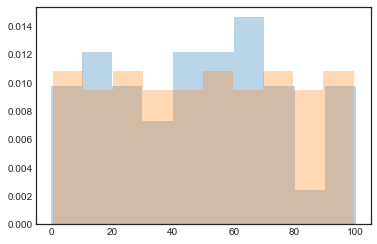

In [24]:
plt.hist(zeller_crc_data_percentiles.iloc[105,:],alpha=0.3,normed=1.0)
plt.hist(zeller_h_data_percentiles.iloc[105,:],alpha=0.3,normed=1.0)

plt.show()
#print(sp.stats.percentileofscore(baxter_h_data_raw_nozero.iloc[0,:],baxter_h_data_raw_nozero.iloc[0,:]))
#print(zeller_h_data_percentiles.iloc[2,:])

In [25]:
#get zackular healthy percentile data

zackular_h_data_raw_nozero = zackular_h_data_raw.copy()
zackular_h_data_raw_nozero = zackular_h_data_raw_nozero.replace(0.0,np.nan)
zackular_h_data_raw_nozero_rand = pd.DataFrame(np.random.uniform(0.0,10**-9,size=(zackular_h_data_raw_nozero.shape[0],zackular_h_data_raw_nozero.shape[1])),index=zackular_h_data_raw_nozero.index,columns=zackular_h_data_raw_nozero.columns)
zackular_h_data_raw_nozero[pd.isnull(zackular_h_data_raw_nozero)] = zackular_h_data_raw_nozero_rand[pd.isnull(zackular_h_data_raw_nozero)]

zackular_h_data_percentiles = zackular_h_data_raw_nozero.copy()
for i in range(zackular_h_data_raw_nozero.shape[0]):
    for x in range(zackular_h_data_raw_nozero.shape[1]):
#        if zackular_h_data_raw.iloc[i,x] == 0.0:
#            if np.sum(np.array(zackular_h_data_raw.iloc[i,:])) > 0.0:
#                zackular_h_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(zackular_h_data_raw.iloc[i,:], np.min(np.array(zackular_h_data_raw.iloc[i,:])[np.nonzero(np.array(zackular_h_data_raw.iloc[i,:]))])/2.0,kind='mean'))
#            else:
#                zackular_h_data_percentiles.iloc[i,x] = np.random.uniform(low=0.0,high=sp.stats.percentileofscore(zackular_h_data_raw.iloc[i,:], zackular_h_data_raw.iloc[i,x],kind='mean'))                
#        else:
        zackular_h_data_percentiles.iloc[i,x] = sp.stats.percentileofscore(zackular_h_data_raw_nozero.iloc[i,:], zackular_h_data_raw_nozero.iloc[i,x],kind='mean')


In [26]:
#combine healthy percentile datasets

h_all_data_nmds_percentiles = pd.concat([baxter_h_data_percentiles.copy(),zeller_h_data_percentiles.copy(),zackular_h_data_percentiles.copy()],axis=1)
dat = dat.transpose()[h_all_data_nmds_percentiles.index].transpose()
norm_dat = norm_dat.transpose()[h_all_data_nmds_percentiles.index].transpose()
print(h_all_data_nmds_percentiles.shape)
print(dat.shape)
print(norm_dat.shape)


(1021, 277)
(1021, 277)
(1021, 277)


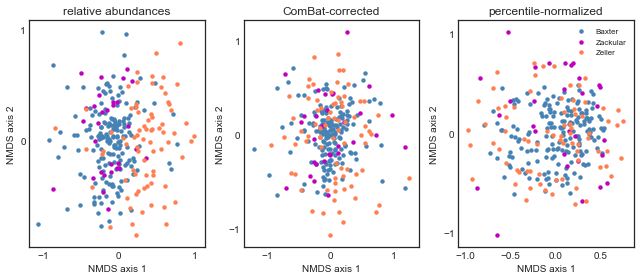

In [28]:
#build data for nmds plot colored by study id - crc
from sklearn import manifold
from sklearn.metrics.pairwise import pairwise_distances


seed = np.random.RandomState(seed=3)
dist_healthy = pairwise_distances(dat.transpose(),metric='braycurtis')
mds_healthy = manifold.MDS(n_components=2, max_iter=500, eps=1e-6, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos_healthy = mds_healthy.fit(dist_healthy).embedding_
nmds_healthy = manifold.MDS(n_components=2, metric=False, max_iter=500, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
nmds_batch_healthy = nmds_healthy.fit_transform(dist_healthy, init=pos_healthy)
seed = np.random.RandomState(seed=3)
dist_healthy_norm = pairwise_distances(norm_dat.transpose(),metric='braycurtis')
mds_healthy_norm = manifold.MDS(n_components=2, max_iter=500, eps=1e-6, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos_healthy_norm = mds_healthy_norm.fit(dist_healthy_norm).embedding_
nmds_healthy_norm = manifold.MDS(n_components=2, metric=False, max_iter=500, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
nmds_batch_healthy_norm = nmds_healthy_norm.fit_transform(dist_healthy_norm, init=pos_healthy_norm)

seed = np.random.RandomState(seed=3)
dist_healthy_percent = pairwise_distances(h_all_data_nmds_percentiles.transpose(),metric='braycurtis')
mds_healthy_percent = manifold.MDS(n_components=2, max_iter=500, eps=1e-6, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos_healthy_percent = mds_healthy_percent.fit(dist_healthy_percent).embedding_
nmds_healthy_percent = manifold.MDS(n_components=2, metric=False, max_iter=500, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
nmds_batch_healthy_percent = nmds_healthy_percent.fit_transform(dist_healthy_percent, init=pos_healthy_percent)

from collections import OrderedDict
#plt.scatter(nmds_batch[:, 0], nmds_batch[:, 1],c=combined_metadata_filt.dataset_id_code, 
#            cmap=plt.cm.Set2,s=10, lw=0, label='NMDS')
#plt.colorbar()
#plt.title('NMDS - color by study')
#plt.savefig('nmds_colorbystudy.png',dpi=300)
#plt.show()
#c=combined_metadata.dataset_id_code, 
#cmap=plt.cm.prism
combined_metadata_crc_studies_healthy = combined_metadata_crc_studies_healthy.sort_index()
#draw nmds study id plot

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(9,4))

for i in range(len(combined_metadata_crc_studies_healthy.color)):
    if combined_metadata_crc_studies_healthy.color[i] == 'coral':
        ax1.scatter(nmds_batch_healthy[i, 0], nmds_batch_healthy[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zeller')
    if combined_metadata_crc_studies_healthy.color[i] == 'm':
        ax1.scatter(nmds_batch_healthy[i, 0], nmds_batch_healthy[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zackular')
    if combined_metadata_crc_studies_healthy.color[i] == 'steelblue':
        ax1.scatter(nmds_batch_healthy[i, 0], nmds_batch_healthy[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Baxter')

for i in range(len(combined_metadata_crc_studies_healthy.color)):
    if combined_metadata_crc_studies_healthy.color[i] == 'coral':
        ax2.scatter(nmds_batch_healthy_norm[i, 0], nmds_batch_healthy_norm[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zeller')
    if combined_metadata_crc_studies_healthy.color[i] == 'm':
        ax2.scatter(nmds_batch_healthy_norm[i, 0], nmds_batch_healthy_norm[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zackular')
    if combined_metadata_crc_studies_healthy.color[i] == 'steelblue':
        ax2.scatter(nmds_batch_healthy_norm[i, 0], nmds_batch_healthy_norm[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Baxter')     
        
for i in range(len(combined_metadata_crc_studies_healthy.color)):
    if combined_metadata_crc_studies_healthy.color[i] == 'coral':
        ax3.scatter(nmds_batch_healthy_percent[i, 0], nmds_batch_healthy_percent[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zeller')
    if combined_metadata_crc_studies_healthy.color[i] == 'm':
        ax3.scatter(nmds_batch_healthy_percent[i, 0], nmds_batch_healthy_percent[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Zackular')
    if combined_metadata_crc_studies_healthy.color[i] == 'steelblue':
        ax3.scatter(nmds_batch_healthy_percent[i, 0], nmds_batch_healthy_percent[i, 1],
                c=combined_metadata_crc_studies_healthy.color[i],s=20, lw=0,label='Baxter')     
#ax1.set_ylim([-0.7,1.1])
ax1.set_xlabel('NMDS axis 1')
ax1.set_ylabel('NMDS axis 2')
ax2.set_xlabel('NMDS axis 1')
ax2.set_ylabel('NMDS axis 2')
ax3.set_xlabel('NMDS axis 1')
ax3.set_ylabel('NMDS axis 2')
ax1.set_title('relative abundances')
ax2.set_title('ComBat-corrected')
ax3.set_title('percentile-normalized')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax3.legend(by_label.values(), by_label.keys(),prop={'size':8},loc=1)
#plt.title('NMDS - color by study (healthy only)')
ax2.locator_params(nbins=4, axis='x')
ax1.locator_params(nbins=4, axis='x')
ax3.locator_params(nbins=4, axis='x')

ax2.locator_params(nbins=4, axis='y')
ax1.locator_params(nbins=4, axis='y')
ax3.locator_params(nbins=4, axis='y')

plt.tight_layout()
plt.show()
#plt.savefig('../batch_effects_paper/revision_figures/nmds_colorbystudy_healthy_crc_combat_percent.pdf',dpi=300,format='pdf')

In [29]:
import skbio as sk
from skbio import DistanceMatrix
dm_raw = DistanceMatrix(dist_healthy,combined_metadata_crc_studies_healthy.index)
#print(pd.DataFrame(dist_healthy))
permanova = sk.stats.distance.permanova(dm_raw,combined_metadata_crc_studies_healthy.color,permutations=10000)

print(permanova)
print('\n')
dm_combat = DistanceMatrix(dist_healthy_norm,combined_metadata_crc_studies_healthy.index)
#print(pd.DataFrame(dist_healthy))
permanova_combat = sk.stats.distance.permanova(dm_combat,combined_metadata_crc_studies_healthy.color,permutations=10000)

print(permanova_combat)
print('\n')
dm_percent = DistanceMatrix(dist_healthy_percent,combined_metadata_crc_studies_healthy.index)
#print(pd.DataFrame(dist_healthy))
permanova_percent = sk.stats.distance.permanova(dm_percent,combined_metadata_crc_studies_healthy.color,permutations=10000)

print(permanova_percent)


method name               PERMANOVA
test statistic name        pseudo-F
sample size                     277
number of groups                  3
test statistic              9.27709
p-value                   9.999e-05
number of permutations        10000
Name: PERMANOVA results, dtype: object


method name                PERMANOVA
test statistic name         pseudo-F
sample size                      277
number of groups                   3
test statistic               1.60908
p-value                   0.00219978
number of permutations         10000
Name: PERMANOVA results, dtype: object


method name               PERMANOVA
test statistic name        pseudo-F
sample size                     277
number of groups                  3
test statistic             0.514211
p-value                           1
number of permutations        10000
Name: PERMANOVA results, dtype: object


In [30]:
pd.DataFrame(dist_healthy).to_csv('../batch_effects_paper/crc_healthy_dm.txt',sep='\t')
pd.Series(combined_metadata_crc_studies_healthy.color).to_csv('../batch_effects_paper/crc_healthy_batches.txt',index=False,sep='\t')

print(np.var(sp.spatial.distance.pdist(dist_healthy))/np.mean(sp.spatial.distance.pdist(dist_healthy)))
print(np.var(sp.spatial.distance.pdist(dist_healthy_percent))/np.mean(sp.spatial.distance.pdist(dist_healthy_percent)))


0.188913004884
0.0434661676328


In [31]:
#sig otus - compare controls across batches

sig_otus_h_baxter_zeller_data = []
baxter_zeller_pvals_data = []
baxter_zeller_pvals_fdr_data = []
sig_otus_h_baxter_zeller_data_names = []
shared_otus = set(zeller_h_data_raw.index).intersection(set(baxter_h_data_raw.index))
for i in range(zeller_h_data_raw.shape[0]):
    if zeller_h_data_raw.index[i] in shared_otus:
        baxter_zeller_pvals_data.append(sp.stats.ranksums(zeller_h_data_raw.iloc[i,:],baxter_h_data_raw.loc[zeller_h_data_raw.index[i],:])[1])

baxter_zeller_pvals_data = np.array(baxter_zeller_pvals_data)
        
baxter_zeller_pvals_fdr_data = sm.sandbox.stats.multicomp.multipletests(np.array(baxter_zeller_pvals_data),alpha=0.01,method='fdr_bh')[1]

for i in range(len(baxter_zeller_pvals_fdr_data)):
    if baxter_zeller_pvals_fdr_data[i] <= 0.01:
        sig_otus_h_baxter_zeller_data_names.append(zeller_h_data_raw.index[i])        
        sig_otus_h_baxter_zeller_data.append([zeller_h_data_raw.index[i],
                       sp.stats.ranksums(zeller_h_data_raw.iloc[i,:],
                          baxter_h_data_raw.iloc[i,:])[0],
                       sp.stats.ranksums(zeller_h_data_raw.iloc[i,:],
                          baxter_h_data_raw.iloc[i,:])[1]])
print('baxter-zeller healthy number of significant OTUs  =', len(sig_otus_h_baxter_zeller_data))

print(zeller_h_data_raw.shape)

baxter-zeller healthy number of significant OTUs  = 681
(1021, 75)


In [32]:
#print(baxter_crc_data_percentiles)
#print(baxter_pvals_fdr_percentiles_data)
#print(list(np.array(baxter_pvals_fdr_percentiles_data_nans)))

In [33]:
#calculate sig for zeller genera alone
sig_percentiles_otus_zeller_data = []
zeller_pvals_percentiles_data = []
zeller_pvals_percentiles_fdr_data = []
sig_percentiles_otus_zeller_data_names = []


for i in range(zeller_crc_data_percentiles.shape[0]):
    if zeller_crc_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_crc_data_raw.shape[1]) >= 1/3.0 or zeller_h_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_h_data_raw.shape[1]) >= 1/3.0:
        zeller_pvals_percentiles_data.append([sp.stats.ranksums(zeller_crc_data_percentiles.iloc[i,:],zeller_h_data_percentiles.iloc[i,:])[0],sp.stats.ranksums(zeller_crc_data_percentiles.iloc[i,:],zeller_h_data_percentiles.iloc[i,:])[1]])
    else:
        zeller_pvals_percentiles_data.append([np.nan,np.nan])
        
zeller_pvals_percentiles_data = pd.DataFrame(zeller_pvals_percentiles_data,index=zeller_crc_data_percentiles.index)
#print(zeller_pvals_percentiles_data.shape)
#
zeller_pvals_percentiles_data_nonan = zeller_pvals_percentiles_data.dropna()

zeller_pvals_percentiles_fdr_data = sm.sandbox.stats.multicomp.multipletests(np.array(zeller_pvals_percentiles_data_nonan.iloc[:,1]),alpha=0.05,method='fdr_bh')[1]

zeller_pvals_percentiles_fdr_data_index = pd.Series(zeller_pvals_percentiles_fdr_data,index=zeller_pvals_percentiles_data_nonan.index)
zeller_pvals_percentiles_fdr_data_nans = zeller_pvals_percentiles_fdr_data_index.reindex(zeller_pvals_percentiles_data.index)

for i in range(len(zeller_pvals_percentiles_fdr_data)):
    if zeller_pvals_percentiles_fdr_data[i] <= 0.05:
        sig_percentiles_otus_zeller_data_names.append(zeller_pvals_percentiles_data_nonan.index[i])        
        sig_percentiles_otus_zeller_data.append([zeller_pvals_percentiles_data_nonan.index[i],
                       sp.stats.ranksums(zeller_crc_data_percentiles.loc[zeller_pvals_percentiles_data_nonan.index[i],:],
                          zeller_h_data_percentiles.loc[zeller_pvals_percentiles_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(zeller_crc_data_percentiles.loc[zeller_pvals_percentiles_data_nonan.index[i],:],
                          zeller_h_data_percentiles.loc[zeller_pvals_percentiles_data_nonan.index[i],:])[1]])

print('zeller number of significant OTUs - percentiles =',len(sig_percentiles_otus_zeller_data))

#calculate sig for baxter genera alone
sig_percentiles_otus_baxter_data = []
baxter_pvals_percentiles_data = []
baxter_pvals_percentiles_fdr_data = []
sig_percentiles_otus_baxter_data_names = []


for i in range(baxter_crc_data_percentiles.shape[0]):
    if baxter_crc_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_crc_data_raw.shape[1]) >= 1/3.0 or baxter_h_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_h_data_raw.shape[1]) >= 1/3.0:
        baxter_pvals_percentiles_data.append([sp.stats.ranksums(baxter_crc_data_percentiles.iloc[i,:],baxter_h_data_percentiles.iloc[i,:])[0],sp.stats.ranksums(baxter_crc_data_percentiles.iloc[i,:],baxter_h_data_percentiles.iloc[i,:])[1]])
    else:
        baxter_pvals_percentiles_data.append([np.nan,np.nan])
        
baxter_pvals_percentiles_data = pd.DataFrame(baxter_pvals_percentiles_data,index=baxter_crc_data_percentiles.index)
#print(baxter_pvals_percentiles_data.shape)
#
baxter_pvals_percentiles_data_nonan = baxter_pvals_percentiles_data.dropna()

baxter_pvals_percentiles_fdr_data = sm.sandbox.stats.multicomp.multipletests(np.array(baxter_pvals_percentiles_data_nonan.iloc[:,1]),alpha=0.05,method='fdr_bh')[1]

baxter_pvals_percentiles_fdr_data_index = pd.Series(baxter_pvals_percentiles_fdr_data,index=baxter_pvals_percentiles_data_nonan.index)
baxter_pvals_percentiles_fdr_data_nans = baxter_pvals_percentiles_fdr_data_index.reindex(baxter_pvals_percentiles_data.index)

for i in range(len(baxter_pvals_percentiles_fdr_data)):
    if baxter_pvals_percentiles_fdr_data[i] <= 0.05:
        sig_percentiles_otus_baxter_data_names.append(baxter_pvals_percentiles_data_nonan.index[i])        
        sig_percentiles_otus_baxter_data.append([baxter_pvals_percentiles_data_nonan.index[i],
                       sp.stats.ranksums(baxter_crc_data_percentiles.loc[baxter_pvals_percentiles_data_nonan.index[i],:],
                          baxter_h_data_percentiles.loc[baxter_pvals_percentiles_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(baxter_crc_data_percentiles.loc[baxter_pvals_percentiles_data_nonan.index[i],:],
                          baxter_h_data_percentiles.loc[baxter_pvals_percentiles_data_nonan.index[i],:])[1]])

print('baxter number of significant OTUs - percentiles =',len(sig_percentiles_otus_baxter_data))

zeller number of significant OTUs - percentiles = 19
baxter number of significant OTUs - percentiles = 13


In [34]:
#plt.hist(baxter_pvals_percentiles_data)
#plt.show()
#print(list(baxter_pvals_percentiles_data))

In [35]:
#calculate sig raw OTUs CRC - deal with nans for multitest correction

sig_raw_otus_baxter_data = []
baxter_pvals_raw_data = []
baxter_pvals_fdr_raw_data = []
sig_raw_otus_baxter_data_names = []
baxter_index = []

for i in range(baxter_crc_data_raw.shape[0]):
    if baxter_crc_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_crc_data_raw.shape[1]) >= 1/3.0 or baxter_h_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_h_data_raw.shape[1]) >= 1/3.0:
        baxter_pvals_raw_data.append(sp.stats.ranksums(baxter_crc_data_raw.iloc[i,:],baxter_h_data_raw.iloc[i,:])[1])
    else:
#        baxter_pvals_raw_data.append(np.random.random(1))
        baxter_pvals_raw_data.append(np.nan)

baxter_pvals_raw_data = pd.Series(baxter_pvals_raw_data,index=baxter_crc_data_raw.index)
baxter_pvals_raw_data_nonan = baxter_pvals_raw_data.dropna()
        
baxter_pvals_fdr_raw_data = sm.sandbox.stats.multicomp.multipletests(np.array(baxter_pvals_raw_data_nonan),alpha=0.05,method='fdr_bh')[1]
baxter_pvals_fdr_raw_data_index = pd.Series(baxter_pvals_fdr_raw_data,index=baxter_pvals_raw_data_nonan.index)
baxter_pvals_fdr_raw_data_nans = baxter_pvals_fdr_raw_data_index.reindex(baxter_pvals_raw_data.index)

for i in range(len(baxter_pvals_fdr_raw_data)):
    if baxter_pvals_fdr_raw_data[i] <= 0.05:
        sig_raw_otus_baxter_data_names.append(baxter_pvals_raw_data_nonan.index[i])        
        sig_raw_otus_baxter_data.append([baxter_pvals_raw_data_nonan.index[i],
                       sp.stats.ranksums(baxter_crc_data_raw.loc[baxter_pvals_raw_data_nonan.index[i],:],
                          baxter_h_data_raw.loc[baxter_pvals_raw_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(baxter_crc_data_raw.loc[baxter_pvals_raw_data_nonan.index[i],:],
                          baxter_h_data_raw.loc[baxter_pvals_raw_data_nonan.index[i],:])[1]])
print('baxter number of sig_rawnificant OTUs =', len(sig_raw_otus_baxter_data))
print(sig_raw_otus_baxter_data_names)


sig_raw_otus_zeller_data = []
zeller_pvals_raw_data = []
zeller_pvals_fdr_raw_data = []
sig_raw_otus_zeller_data_names = []
zeller_index = []

for i in range(zeller_crc_data_raw.shape[0]):
    if zeller_crc_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_crc_data_raw.shape[1]) >= 1/3.0 or zeller_h_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_h_data_raw.shape[1]) >= 1/3.0:
        zeller_pvals_raw_data.append(sp.stats.ranksums(zeller_crc_data_raw.iloc[i,:],zeller_h_data_raw.iloc[i,:])[1])
    else:
#        zeller_pvals_raw_data.append(np.random.random(1))
        zeller_pvals_raw_data.append(np.nan)

zeller_pvals_raw_data = pd.Series(zeller_pvals_raw_data,index=zeller_crc_data_raw.index)
zeller_pvals_raw_data_nonan = zeller_pvals_raw_data.dropna()
        
zeller_pvals_fdr_raw_data = sm.sandbox.stats.multicomp.multipletests(np.array(zeller_pvals_raw_data_nonan),alpha=0.05,method='fdr_bh')[1]
zeller_pvals_fdr_raw_data_index = pd.Series(zeller_pvals_fdr_raw_data,index=zeller_pvals_raw_data_nonan.index)
zeller_pvals_fdr_raw_data_nans = zeller_pvals_fdr_raw_data_index.reindex(zeller_pvals_raw_data.index)

for i in range(len(zeller_pvals_fdr_raw_data)):
    if zeller_pvals_fdr_raw_data[i] <= 0.05:
        sig_raw_otus_zeller_data_names.append(zeller_pvals_raw_data_nonan.index[i])        
        sig_raw_otus_zeller_data.append([zeller_pvals_raw_data_nonan.index[i],
                       sp.stats.ranksums(zeller_crc_data_raw.loc[zeller_pvals_raw_data_nonan.index[i],:],
                          zeller_h_data_raw.loc[zeller_pvals_raw_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(zeller_crc_data_raw.loc[zeller_pvals_raw_data_nonan.index[i],:],
                          zeller_h_data_raw.loc[zeller_pvals_raw_data_nonan.index[i],:])[1]])
print('zeller number of sig_rawnificant OTUs =', len(sig_raw_otus_zeller_data))
print(sig_raw_otus_zeller_data_names)



baxter number of sig_rawnificant OTUs = 14
['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo174', 'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae;g__Haemophilus;s__;d__denovo46', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium;s__;d__denovo919', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo459', '

In [36]:
for i in range(len(sig_raw_otus_zeller_data_names)):
    print(sig_raw_otus_zeller_data_names[i].split(';')[-3])
print(len(sig_raw_otus_zeller_data_names))

g__Bacteroides
g__Streptococcus
g__Blautia
g__Fusobacterium
g__Butyricimonas
g__Anaerostipes
g__Fusobacterium
g__Peptostreptococcus
g__Dialister
g__Alistipes
g__Parvimonas
g__Bacteroides
g__Clostridium_XlVa
g__Butyricimonas
g__Clostridium_XlVa
g__Parabacteroides
g__Butyricicoccus
g__Streptococcus
18


In [37]:
for i in range(len(sig_raw_otus_baxter_data_names)):
    print(sig_raw_otus_baxter_data_names[i].split(';')[-3])
print(len(sig_raw_otus_baxter_data_names))

g__Butyricicoccus
g__Fusobacterium
g__Clostridium_XlVa
g__Haemophilus
g__Faecalibacterium
g__Peptostreptococcus
g__Parvimonas
g__Bacteroides
g__Gemmiger
g__Roseburia
g__Streptophyta
g__Clostridium_XlVa
g__Coprococcus
g__Porphyromonas
14


In [38]:
#calculate sig combat OTUs CRC - deal with nans for multitest correction

sig_combat_otus_baxter_data = []
baxter_pvals_combat_data = []
baxter_pvals_fdr_combat_data = []
sig_combat_otus_baxter_data_names = []
baxter_index = []

for i in range(baxter_crc_data_combat.shape[0]):
    if baxter_crc_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_crc_data_raw.shape[1]) >= 1/3.0 or baxter_h_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_h_data_raw.shape[1]) >= 1/3.0:
        baxter_pvals_combat_data.append(sp.stats.ranksums(baxter_crc_data_combat.iloc[i,:],baxter_h_data_combat.iloc[i,:])[1])
    else:
#        baxter_pvals_combat_data.append(np.random.random(1))
        baxter_pvals_combat_data.append(np.nan)

baxter_pvals_combat_data = pd.Series(baxter_pvals_combat_data,index=baxter_crc_data_combat.index)
baxter_pvals_combat_data_nonan = baxter_pvals_combat_data.dropna()
        
baxter_pvals_fdr_combat_data = sm.sandbox.stats.multicomp.multipletests(np.array(baxter_pvals_combat_data_nonan),alpha=0.05,method='fdr_bh')[1]
baxter_pvals_fdr_combat_data_index = pd.Series(baxter_pvals_fdr_combat_data,index=baxter_pvals_combat_data_nonan.index)
baxter_pvals_fdr_combat_data_nans = baxter_pvals_fdr_combat_data_index.reindex(baxter_pvals_combat_data.index)

for i in range(len(baxter_pvals_fdr_combat_data)):
    if baxter_pvals_fdr_combat_data[i] <= 0.05:
        sig_combat_otus_baxter_data_names.append(baxter_pvals_combat_data_nonan.index[i])        
        sig_combat_otus_baxter_data.append([baxter_pvals_combat_data_nonan.index[i],
                       sp.stats.ranksums(baxter_crc_data_combat.loc[baxter_pvals_combat_data_nonan.index[i],:],
                          baxter_h_data_combat.loc[baxter_pvals_combat_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(baxter_crc_data_combat.loc[baxter_pvals_combat_data_nonan.index[i],:],
                          baxter_h_data_combat.loc[baxter_pvals_combat_data_nonan.index[i],:])[1]])
print('baxter number of sig_combatnificant OTUs =', len(sig_combat_otus_baxter_data))
print(sig_combat_otus_baxter_data_names)


sig_combat_otus_zeller_data = []
zeller_pvals_combat_data = []
zeller_pvals_fdr_combat_data = []
sig_combat_otus_zeller_data_names = []
zeller_index = []

for i in range(zeller_crc_data_combat.shape[0]):
    if zeller_crc_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_crc_data_raw.shape[1]) >= 1/3.0 or zeller_h_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_h_data_raw.shape[1]) >= 1/3.0:
        zeller_pvals_combat_data.append(sp.stats.ranksums(zeller_crc_data_combat.iloc[i,:],zeller_h_data_combat.iloc[i,:])[1])
    else:
#        zeller_pvals_combat_data.append(np.random.random(1))
        zeller_pvals_combat_data.append(np.nan)

zeller_pvals_combat_data = pd.Series(zeller_pvals_combat_data,index=zeller_crc_data_combat.index)
zeller_pvals_combat_data_nonan = zeller_pvals_combat_data.dropna()
        
zeller_pvals_fdr_combat_data = sm.sandbox.stats.multicomp.multipletests(np.array(zeller_pvals_combat_data_nonan),alpha=0.05,method='fdr_bh')[1]
zeller_pvals_fdr_combat_data_index = pd.Series(zeller_pvals_fdr_combat_data,index=zeller_pvals_combat_data_nonan.index)
zeller_pvals_fdr_combat_data_nans = zeller_pvals_fdr_combat_data_index.reindex(zeller_pvals_combat_data.index)

for i in range(len(zeller_pvals_fdr_combat_data)):
    if zeller_pvals_fdr_combat_data[i] <= 0.05:
        sig_combat_otus_zeller_data_names.append(zeller_pvals_combat_data_nonan.index[i])        
        sig_combat_otus_zeller_data.append([zeller_pvals_combat_data_nonan.index[i],
                       sp.stats.ranksums(zeller_crc_data_combat.loc[zeller_pvals_combat_data_nonan.index[i],:],
                          zeller_h_data_combat.loc[zeller_pvals_combat_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(zeller_crc_data_combat.loc[zeller_pvals_combat_data_nonan.index[i],:],
                          zeller_h_data_combat.loc[zeller_pvals_combat_data_nonan.index[i],:])[1]])
print('zeller number of sig_combatnificant OTUs =', len(sig_combat_otus_zeller_data))
print(sig_combat_otus_zeller_data_names)



baxter number of sig_combatnificant OTUs = 14
['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo174', 'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae;g__Haemophilus;s__;d__denovo46', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium;s__;d__denovo919', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo459'

In [39]:
#calculate sig limma OTUs CRC - deal with nans for multitest correction

sig_limma_otus_baxter_data = []
baxter_pvals_limma_data = []
baxter_pvals_fdr_limma_data = []
sig_limma_otus_baxter_data_names = []
baxter_index = []

for i in range(baxter_crc_data_limma.shape[0]):
    if baxter_crc_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_crc_data_raw.shape[1]) >= 1/3.0 or baxter_h_data_raw.iloc[i,:].astype(bool).sum()/float(baxter_h_data_raw.shape[1]) >= 1/3.0:
        baxter_pvals_limma_data.append(sp.stats.ranksums(baxter_crc_data_limma.iloc[i,:],baxter_h_data_limma.iloc[i,:])[1])
    else:
#        baxter_pvals_limma_data.append(np.random.random(1))
        baxter_pvals_limma_data.append(np.nan)

baxter_pvals_limma_data = pd.Series(baxter_pvals_limma_data,index=baxter_crc_data_limma.index)
baxter_pvals_limma_data_nonan = baxter_pvals_limma_data.dropna()
        
baxter_pvals_fdr_limma_data = sm.sandbox.stats.multicomp.multipletests(np.array(baxter_pvals_limma_data_nonan),alpha=0.05,method='fdr_bh')[1]
baxter_pvals_fdr_limma_data_index = pd.Series(baxter_pvals_fdr_limma_data,index=baxter_pvals_limma_data_nonan.index)
baxter_pvals_fdr_limma_data_nans = baxter_pvals_fdr_limma_data_index.reindex(baxter_pvals_limma_data.index)

for i in range(len(baxter_pvals_fdr_limma_data)):
    if baxter_pvals_fdr_limma_data[i] <= 0.05:
        sig_limma_otus_baxter_data_names.append(baxter_pvals_limma_data_nonan.index[i])        
        sig_limma_otus_baxter_data.append([baxter_pvals_limma_data_nonan.index[i],
                       sp.stats.ranksums(baxter_crc_data_limma.loc[baxter_pvals_limma_data_nonan.index[i],:],
                          baxter_h_data_limma.loc[baxter_pvals_limma_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(baxter_crc_data_limma.loc[baxter_pvals_limma_data_nonan.index[i],:],
                          baxter_h_data_limma.loc[baxter_pvals_limma_data_nonan.index[i],:])[1]])
print('baxter number of sig_limmanificant OTUs =', len(sig_limma_otus_baxter_data))
print(sig_limma_otus_baxter_data_names)


sig_limma_otus_zeller_data = []
zeller_pvals_limma_data = []
zeller_pvals_fdr_limma_data = []
sig_limma_otus_zeller_data_names = []
zeller_index = []

for i in range(zeller_crc_data_limma.shape[0]):
    if zeller_crc_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_crc_data_raw.shape[1]) >= 1/3.0 or zeller_h_data_raw.iloc[i,:].astype(bool).sum()/float(zeller_h_data_raw.shape[1]) >= 1/3.0:
        zeller_pvals_limma_data.append(sp.stats.ranksums(zeller_crc_data_limma.iloc[i,:],zeller_h_data_limma.iloc[i,:])[1])    
    else:
#        zeller_pvals_limma_data.append(np.random.random(1))
        zeller_pvals_limma_data.append(np.nan)

zeller_pvals_limma_data = pd.Series(zeller_pvals_limma_data,index=zeller_crc_data_limma.index)
zeller_pvals_limma_data_nonan = zeller_pvals_limma_data.dropna()
        
zeller_pvals_fdr_limma_data = sm.sandbox.stats.multicomp.multipletests(np.array(zeller_pvals_limma_data_nonan),alpha=0.05,method='fdr_bh')[1]
zeller_pvals_fdr_limma_data_index = pd.Series(zeller_pvals_fdr_limma_data,index=zeller_pvals_limma_data_nonan.index)
zeller_pvals_fdr_limma_data_nans = zeller_pvals_fdr_limma_data_index.reindex(zeller_pvals_limma_data.index)

for i in range(len(zeller_pvals_fdr_limma_data)):
    if zeller_pvals_fdr_limma_data[i] <= 0.05:
        sig_limma_otus_zeller_data_names.append(zeller_pvals_limma_data_nonan.index[i])        
        sig_limma_otus_zeller_data.append([zeller_pvals_limma_data_nonan.index[i],
                       sp.stats.ranksums(zeller_crc_data_limma.loc[zeller_pvals_limma_data_nonan.index[i],:],
                          zeller_h_data_limma.loc[zeller_pvals_limma_data_nonan.index[i],:])[0],
                       sp.stats.ranksums(zeller_crc_data_limma.loc[zeller_pvals_limma_data_nonan.index[i],:],
                          zeller_h_data_limma.loc[zeller_pvals_limma_data_nonan.index[i],:])[1]])
print('zeller number of sig_limmanificant OTUs =', len(sig_limma_otus_zeller_data))
print(sig_limma_otus_zeller_data_names)



baxter number of sig_limmanificant OTUs = 14
['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo174', 'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pasteurellales;f__Pasteurellaceae;g__Haemophilus;s__;d__denovo46', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Faecalibacterium;s__;d__denovo919', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo459',

In [40]:
for i in range(len(sig_limma_otus_zeller_data_names)):
    print(sig_limma_otus_zeller_data_names[i].split(';')[-3])
print(len(sig_limma_otus_zeller_data_names))

g__Bacteroides
g__Streptococcus
g__Blautia
g__Fusobacterium
g__Butyricimonas
g__Anaerostipes
g__Fusobacterium
g__Streptococcus
g__Peptostreptococcus
g__Dialister
g__Alistipes
g__Parvimonas
g__Bacteroides
g__Clostridium_XlVa
g__Butyricimonas
g__Clostridium_XlVa
g__Parabacteroides
g__Butyricicoccus
g__Streptococcus
19


In [41]:
print(set(sig_combat_otus_zeller_data_names) - set(sig_raw_otus_zeller_data_names))
print(set(sig_limma_otus_zeller_data_names) - set(sig_combat_otus_zeller_data_names))
print(len(set(sig_limma_otus_zeller_data_names).intersection(set(sig_combat_otus_zeller_data_names))))

{'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1317'}
set()
19


In [42]:
#merge data sets

crc_all_data_raw = pd.concat([baxter_crc_data_raw.copy(),zeller_crc_data_raw.copy()],axis=1)
h_all_data_raw = pd.concat([baxter_h_data_raw.copy(),zeller_h_data_raw.copy()],axis=1)

crc_all_data_percentiles = pd.concat([baxter_crc_data_percentiles.copy(),zeller_crc_data_percentiles.copy()],axis=1)
h_all_data_percentiles = pd.concat([baxter_h_data_percentiles.copy(),zeller_h_data_percentiles.copy()],axis=1)

crc_all_data_combat = pd.concat([baxter_crc_data_combat.copy(),zeller_crc_data_combat.copy()],axis=1)
h_all_data_combat = pd.concat([baxter_h_data_combat.copy(),zeller_h_data_combat.copy()],axis=1)

crc_all_data_limma = pd.concat([baxter_crc_data_limma.copy(),zeller_crc_data_limma.copy()],axis=1)
h_all_data_limma = pd.concat([baxter_h_data_limma.copy(),zeller_h_data_limma.copy()],axis=1)


In [43]:
#calculate significance for merged data - raw
sig_raw_otus_all_data = []
all_pvals_data = []
all_pvals_fdr_raw_data = []
sig_raw_otus_all_data_names = []
test_index = []

for i in range(crc_all_data_raw.shape[0]):
    if h_all_data_raw.iloc[i,:].astype(bool).sum()/float(h_all_data_raw.shape[1]) >= 1/3.0 or crc_all_data_raw.iloc[i,:].astype(bool).sum()/float(crc_all_data_raw.shape[1]) >= 1/3.0:
        all_pvals_data.append(sp.stats.ranksums(crc_all_data_raw.iloc[i,:],
                                                         h_all_data_raw.iloc[i,:])[1])
    else:
        all_pvals_data.append(np.nan)
#    test_index.append(i)

all_pvals_data = pd.Series(all_pvals_data,index=crc_all_data_raw.index)
all_pvals_data_nonan = all_pvals_data.dropna()
all_pvals_fdr_raw_data = sm.sandbox.stats.multicomp.multipletests(np.array(all_pvals_data_nonan),alpha=0.05,method='fdr_bh')[1]

all_pvals_fdr_raw_data_index = pd.Series(all_pvals_fdr_raw_data,index=all_pvals_data_nonan.index)
all_pvals_fdr_raw_data_nans = all_pvals_fdr_raw_data_index.reindex(all_pvals_data.index)


for i in range(len(all_pvals_fdr_raw_data)):
    if all_pvals_fdr_raw_data[i] <= 0.05:
        sig_raw_otus_all_data_names.append(all_pvals_data_nonan.index[i])        
        sig_raw_otus_all_data.append([all_pvals_data_nonan.index[i],all_pvals_fdr_raw_data[i]])

print('all - number of raw significant OTUs =', len(sig_raw_otus_all_data_names))
print(sig_raw_otus_all_data_names)

all - number of raw significant OTUs = 30
['k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo33', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;d__denovo146', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo997', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo507', 'k__Bacteria;p__;c__;o__;f__;g__;s__;d__denovo20', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo174', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__B

In [44]:
#for i in range(len(sig_raw_otus_all_data_names)):
#    print(sig_raw_otus_all_data_names[i].split(';')[-4]+sig_raw_otus_all_data_names[i].split(';')[-3])
#print(len(sig_raw_otus_all_data_names))
print(len(set(set(sig_raw_otus_zeller_data_names) | set(sig_raw_otus_baxter_data_names)) - set(sig_raw_otus_all_data_names)))
print(set(set(sig_raw_otus_zeller_data_names) | set(sig_raw_otus_baxter_data_names)) - set(sig_raw_otus_all_data_names))
print(len(set(sig_raw_otus_all_data_names) - set(set(sig_raw_otus_zeller_data_names) | set(sig_raw_otus_baxter_data_names))))
print(set(sig_raw_otus_all_data_names) - set(set(sig_raw_otus_zeller_data_names) | set(sig_raw_otus_baxter_data_names)))
print(len(set(sig_raw_otus_all_data_names).intersection(set(set(sig_raw_otus_zeller_data_names) | set(sig_raw_otus_baxter_data_names)))))

9
{'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo2540', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo2622', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo305', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo1386', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__;d__denovo111', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo474', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo1751', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1277', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnosp

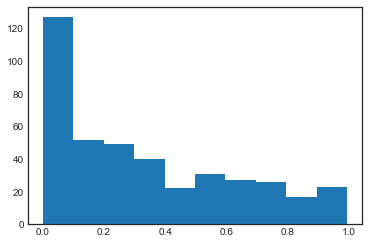

In [45]:
#print(all_pvals_data_nonan.shape)
plt.hist(np.array(all_pvals_data_nonan.iloc[:]))
plt.show()
#print(all_pvals_data)

In [46]:
#calculate significance for merged data - combat
sig_combat_otus_all_data = []
all_pvals_data = []
all_pvals_fdr_combat_data = []
sig_combat_otus_all_data_names = []
test_index = []

for i in range(crc_all_data_combat.shape[0]):
    if h_all_data_raw.iloc[i,:].astype(bool).sum()/float(h_all_data_raw.shape[1]) >= 1/3.0 or crc_all_data_raw.iloc[i,:].astype(bool).sum()/float(crc_all_data_raw.shape[1]) >= 1/3.0:
        all_pvals_data.append(sp.stats.ranksums(crc_all_data_combat.iloc[i,:],
                                                         h_all_data_combat.iloc[i,:])[1])
    else:
        all_pvals_data.append(np.nan)
#    test_index.append(i)

all_pvals_data = pd.Series(all_pvals_data,index=crc_all_data_combat.index)
all_pvals_data_nonan = all_pvals_data.dropna()
all_pvals_fdr_combat_data = sm.sandbox.stats.multicomp.multipletests(np.array(all_pvals_data_nonan),alpha=0.05,method='fdr_bh')[1]

all_pvals_fdr_combat_data_index = pd.Series(all_pvals_fdr_combat_data,index=all_pvals_data_nonan.index)
all_pvals_fdr_combat_data_nans = all_pvals_fdr_combat_data_index.reindex(all_pvals_data.index)


for i in range(len(all_pvals_fdr_combat_data)):
    if all_pvals_fdr_combat_data[i] <= 0.05:
        sig_combat_otus_all_data_names.append(all_pvals_data_nonan.index[i])        
        sig_combat_otus_all_data.append([all_pvals_data_nonan.index[i],all_pvals_fdr_combat_data[i]])

print('all - number of combat significant OTUs =', len(sig_combat_otus_all_data_names))
print(sig_combat_otus_all_data_names)

all - number of combat significant OTUs = 36
['k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Bilophila;s__;d__denovo104', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo33', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;d__denovo146', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__;s__;d__denovo137', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo997', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1277', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo507', 'k__Bacteria;p__;c__;o__;f__;g__;s__;d__denovo20', 'k__Bacteria;p__Firm

In [47]:
#for i in range(len(sig_combat_otus_all_data_names)):
#    print(sig_combat_otus_all_data_names[i].split(';')[-4]+sig_combat_otus_all_data_names[i].split(';')[-3])
#print(len(sig_combat_otus_all_data_names))
print(len(set(set(sig_combat_otus_zeller_data_names) | set(sig_combat_otus_baxter_data_names)) - set(sig_combat_otus_all_data_names)))
print(set(set(sig_combat_otus_zeller_data_names) | set(sig_combat_otus_baxter_data_names)) - set(sig_combat_otus_all_data_names))
print(len(set(sig_combat_otus_all_data_names) - set(set(sig_combat_otus_zeller_data_names) | set(sig_combat_otus_baxter_data_names))))
print(set(sig_combat_otus_all_data_names) - set(set(sig_combat_otus_zeller_data_names) | set(sig_combat_otus_baxter_data_names)))
print(len(set(sig_combat_otus_all_data_names).intersection(set(set(sig_combat_otus_zeller_data_names) | set(sig_combat_otus_baxter_data_names)))))

9
{'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1317', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo2540', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo305', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo1386', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__;d__denovo111', 'k__Bacteria;p__Cyanobacteria/Chloroplast;c__Chloroplast;o__;f__Chloroplast;g__Streptophyta;s__;d__denovo315', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo474', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo1751', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnos

In [48]:
#calculate significance for merged data - limma
sig_limma_otus_all_data = []
all_pvals_data = []
all_pvals_fdr_limma_data = []
sig_limma_otus_all_data_names = []
test_index = []

for i in range(crc_all_data_limma.shape[0]):
    if h_all_data_raw.iloc[i,:].astype(bool).sum()/float(h_all_data_raw.shape[1]) >= 1/3.0 or crc_all_data_raw.iloc[i,:].astype(bool).sum()/float(crc_all_data_raw.shape[1]) >= 1/3.0:
        all_pvals_data.append(sp.stats.ranksums(crc_all_data_limma.iloc[i,:],
                                                         h_all_data_limma.iloc[i,:])[1])
    else:
        all_pvals_data.append(np.nan)
#    test_index.append(i)

all_pvals_data = pd.Series(all_pvals_data,index=crc_all_data_limma.index)
all_pvals_data_nonan = all_pvals_data.dropna()
all_pvals_fdr_limma_data = sm.sandbox.stats.multicomp.multipletests(np.array(all_pvals_data_nonan),alpha=0.05,method='fdr_bh')[1]

all_pvals_fdr_limma_data_index = pd.Series(all_pvals_fdr_limma_data,index=all_pvals_data_nonan.index)
all_pvals_fdr_limma_data_nans = all_pvals_fdr_limma_data_index.reindex(all_pvals_data.index)


for i in range(len(all_pvals_fdr_limma_data)):
    if all_pvals_fdr_limma_data[i] <= 0.05:
        sig_limma_otus_all_data_names.append(all_pvals_data_nonan.index[i])        
        sig_limma_otus_all_data.append([all_pvals_data_nonan.index[i],all_pvals_fdr_limma_data[i]])

print('all - number of limma significant OTUs =', len(sig_limma_otus_all_data_names))
print(sig_limma_otus_all_data_names)

all - number of limma significant OTUs = 37
['k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo33', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;d__denovo146', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__;g__;s__;d__denovo137', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo997', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1277', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo507', 'k__Bacteria;p__;c__;o__;f__;g__;s__;d__denovo20', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__;d__denovo220', 'k__Bacteria;p__Fusobacteria;c__Fusobac

In [49]:
#for i in range(len(sig_limma_otus_all_data_names)):
#    print(sig_limma_otus_all_data_names[i].split(';')[-4]+sig_limma_otus_all_data_names[i].split(';')[-3])
#print(len(sig_limma_otus_all_data_names))
print(len(set(set(sig_limma_otus_zeller_data_names) | set(sig_limma_otus_baxter_data_names)) - set(sig_limma_otus_all_data_names)))
print(set(set(sig_limma_otus_zeller_data_names) | set(sig_limma_otus_baxter_data_names)) - set(sig_limma_otus_all_data_names))
print(len(set(sig_limma_otus_all_data_names) - set(set(sig_limma_otus_zeller_data_names) | set(sig_limma_otus_baxter_data_names))))
print(set(sig_limma_otus_all_data_names) - set(set(sig_limma_otus_zeller_data_names) | set(sig_limma_otus_baxter_data_names)))
print(len(set(sig_limma_otus_all_data_names).intersection(set(set(sig_limma_otus_zeller_data_names) | set(sig_limma_otus_baxter_data_names)))))

8
{'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1317', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo2540', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo305', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo1386', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Rikenellaceae;g__Alistipes;s__;d__denovo111', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo474', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo1751', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia;s__;d__denovo11'}
16
{'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnosp

In [50]:
#calculate significance for merged data - percentiles
sig_percentiles_otus_all_data = []
all_pvals_data = []
all_pvals_fdr_percentiles_data = []
sig_percentiles_otus_all_data_names = []
test_index = []

for i in range(crc_all_data_percentiles.shape[0]):
    if h_all_data_raw.iloc[i,:].astype(bool).sum()/float(h_all_data_raw.shape[1]) >= 1/3.0 or crc_all_data_raw.iloc[i,:].astype(bool).sum()/float(crc_all_data_raw.shape[1]) >= 1/3.0:
        all_pvals_data.append(sp.stats.ranksums(crc_all_data_percentiles.iloc[i,:],
                                                         h_all_data_percentiles.iloc[i,:])[1])
    else:
        all_pvals_data.append(np.nan)
#    test_index.append(i)

all_pvals_data = pd.Series(all_pvals_data,index=crc_all_data_percentiles.index)
all_pvals_data_nonan = all_pvals_data.dropna()
all_pvals_fdr_percentiles_data = sm.sandbox.stats.multicomp.multipletests(np.array(all_pvals_data_nonan),alpha=0.05,method='fdr_bh')[1]

all_pvals_fdr_percentiles_data_index = pd.Series(all_pvals_fdr_percentiles_data,index=all_pvals_data_nonan.index)
all_pvals_fdr_percentiles_data_nans = all_pvals_fdr_percentiles_data_index.reindex(all_pvals_data.index)


for i in range(len(all_pvals_fdr_percentiles_data)):
    if all_pvals_fdr_percentiles_data[i] <= 0.05:
        sig_percentiles_otus_all_data_names.append(all_pvals_data_nonan.index[i])        
        sig_percentiles_otus_all_data.append([all_pvals_data_nonan.index[i],all_pvals_fdr_percentiles_data[i]])

print('all - number of percentiles significant OTUs =', len(sig_percentiles_otus_all_data_names))
print(sig_percentiles_otus_all_data_names)

all - number of percentiles significant OTUs = 39
['k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio;s__;d__denovo158', 'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Bilophila;s__;d__denovo104', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Parabacteroides;s__;d__denovo33', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;d__denovo146', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo124', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo997', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Roseburia;s__;d__denovo507', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospiracea_incertae_sedis;s__;d__denovo132', '

In [51]:
#for i in range(len(sig_percentiles_otus_all_data_names)):
#    print(sig_percentiles_otus_all_data_names[i].split(';')[-4]+sig_percentiles_otus_all_data_names[i].split(';')[-3])
#print(len(sig_percentiles_otus_all_data_names))
print(len(set(set(sig_percentiles_otus_zeller_data_names) | set(sig_percentiles_otus_baxter_data_names)) - set(sig_percentiles_otus_all_data_names)))
print(set(set(sig_percentiles_otus_zeller_data_names) | set(sig_percentiles_otus_baxter_data_names)) - set(sig_percentiles_otus_all_data_names))
print(len(set(sig_percentiles_otus_all_data_names) - set(set(sig_percentiles_otus_zeller_data_names) | set(sig_percentiles_otus_baxter_data_names))))
print(set(sig_percentiles_otus_all_data_names) - set(set(sig_percentiles_otus_zeller_data_names) | set(sig_percentiles_otus_baxter_data_names)))
across_not_within = list(set(sig_percentiles_otus_all_data_names) - set(set(sig_percentiles_otus_zeller_data_names) | set(sig_percentiles_otus_baxter_data_names)))
print(len(set(sig_percentiles_otus_all_data_names).intersection(set(set(sig_percentiles_otus_zeller_data_names) | set(sig_percentiles_otus_baxter_data_names)))))

9
{'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Butyricicoccus;s__;d__denovo2540', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospiracea_incertae_sedis;s__;d__denovo2837', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo305', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo3847', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Butyricimonas;s__;d__denovo1386', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo2987', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__;d__denovo474', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo1277', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachno

In [52]:
print(set(sig_combat_otus_all_data_names) - set(sig_limma_otus_all_data_names))
print(len(set(sig_combat_otus_all_data_names).intersection(set(sig_limma_otus_all_data_names))))
print(len(set(sig_percentiles_otus_all_data_names).intersection(set(sig_limma_otus_all_data_names))))
print(len(set(sig_percentiles_otus_all_data_names).intersection(set(sig_combat_otus_all_data_names))))

{'k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Bilophila;s__;d__denovo104'}
35
31
30


In [53]:
print(len(across_not_within))

20


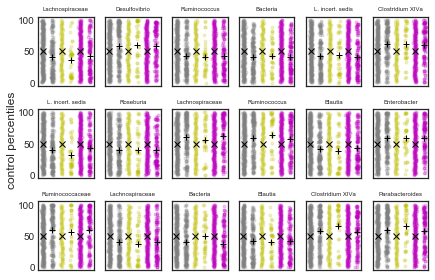

In [153]:
#plot 17 OTUs significant across but not within

#across and within boxplots
#plt.clf()
norm_data = []
cancer_data = []
data = []
fig, axs = plt.subplots(3,6,sharey=True,squeeze=False)
axs = axs.ravel()
for i in range(len(list(across_not_within))):
    norm_data = []
    cancer_data = []
    data = []
    y = []
    x = []
    norm_data = np.array(h_all_data_percentiles.transpose()[list(across_not_within)[i]].dropna().values)
    cancer_data = np.array(crc_all_data_percentiles.transpose()[list(across_not_within)[i]].dropna().values)
#    plt.figure()
#    for j in [1,2]:
#        y = data[j-1]
#        x = np.random.normal(j, 0.02, len(y))
#        plt.plot(x, y, 'r.',alpha=0.2)
    norm_data1 = np.array(zeller_h_data_percentiles.transpose()[list(across_not_within)[i]].dropna().values)
    cancer_data1 = np.array(zeller_crc_data_percentiles.transpose()[list(across_not_within)[i]].dropna().values)
    data1 = [norm_data1,cancer_data1]
    norm_data2 = np.array(baxter_h_data_percentiles.transpose()[list(across_not_within)[i]].dropna().values)
    cancer_data2 = np.array(baxter_crc_data_percentiles.transpose()[list(across_not_within)[i]].dropna().values)
    data2 = [norm_data2,cancer_data2]
    data = [norm_data,cancer_data,norm_data1,cancer_data1,norm_data2,cancer_data2]    
    color = ['gray','gray','y','y','m','m']
    labels = ['pooled','pooled','Zeller','Zeller','Baxter','Baxter']
#    marker = ['s','^','s','^','s','^','s','^','s','^','s','^']
    marker = ['x','+','x','+','x','+','x','+','x','+']

    for j in [1,2,3,4,5,6]:
        y = []
        x = []
        y = data[j-1]
        y_med = np.mean(data[j-1])
        x = np.random.normal(j, 0.07, len(y))
        axs[i].plot(x, y, 'k.',alpha=0.2,color=color[j-1],markersize=6,label = [j-1])
        axs[i].plot(j, y_med, marker[j-1],markersize=6, alpha=1.0,color='k',lw=2)
#    axs[i].boxplot(data,notch=True)
    axs[i].set_ylim([-5,105])
    axs[i].set_title('%s' % list(across_not_within)[i].split('__')[-3][:-2],fontsize=6)
    axs[i].set_xticklabels(['Healthy pooled','CRC pooled','Healthy Zeller','CRC Zeller','Healthy Baxter','CRC Baxter'],fontsize=6)
#    axs[i].locator_params(nbins=4, axis='y')
    axs[i].axes.get_xaxis().set_visible(False)
#    filename = None
#    filename = '%s_box.png' % (list(sig_otus_within_not_across)[i].replace('/','.'))
#    print i
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90,ha='right')

axs[3].set_title('Bacteria',fontsize=6)
axs[14].set_title('Bacteria',fontsize=6)
axs[0].set_title('Lachnospiraceae',fontsize=6)
axs[5].set_title('Clostridium XIVa',fontsize=6)
#axs[7].set_title('Lachnospiraceae',fontsize=6)
axs[8].set_title('Lachnospiraceae',fontsize=6)
axs[12].set_title('Ruminococcaceae',fontsize=6)
axs[13].set_title('Lachnospiraceae',fontsize=6)
axs[16].set_title('Clostridium XIVa',fontsize=6)

axs[4].set_title('L. incert. sedis',fontsize=6)
axs[6].set_title('L. incert. sedis',fontsize=6)

fig.text(0.0, 0.5, 'control percentiles', va='center', rotation='vertical',fontsize=12)
plt.tight_layout()
#axs[3].axis('off')
#axs[14].axis('off')

#plt.savefig('../batch_effects_paper/across_not_within_crc_otus_combined_plot.pdf',format='png',dpi=300)
plt.show()

In [118]:
print(list(set(sig_percentiles_otus_all_data_names) - set(sig_combat_otus_all_data_names)))

['k__Bacteria;p__Proteobacteria;c__Deltaproteobacteria;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio;s__;d__denovo158', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Lachnospiracea_incertae_sedis;s__;d__denovo132', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Ruminococcus;s__;d__denovo185', 'k__Bacteria;p__Cyanobacteria/Chloroplast;c__Chloroplast;o__;f__Chloroplast;g__Streptophyta;s__;d__denovo315', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__;s__;d__denovo2073', 'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Enterobacter;s__;d__denovo56', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__;s__;d__denovo492', 'k__Bacteria;p__;c__;o__;f__;g__;s__;d__denovo1559', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia;s__;d__denovo1076', 'k__Bacteria;p__Fir

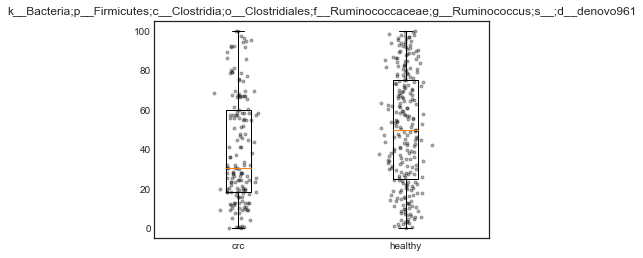

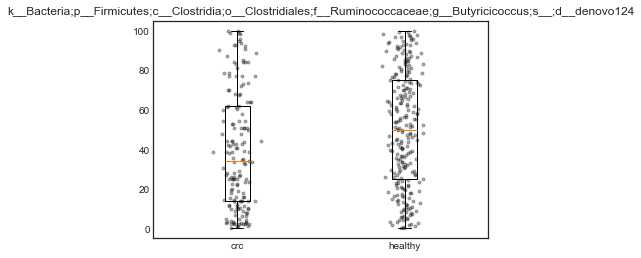

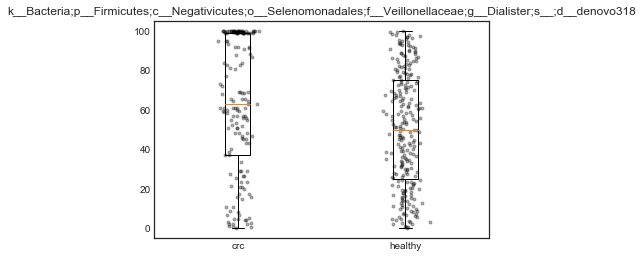

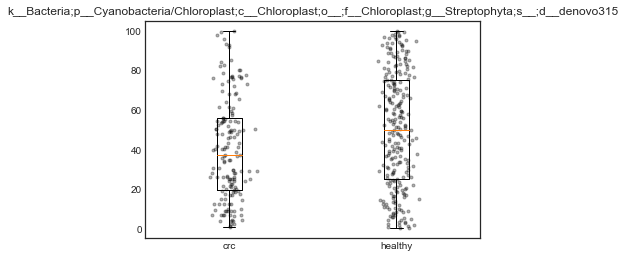

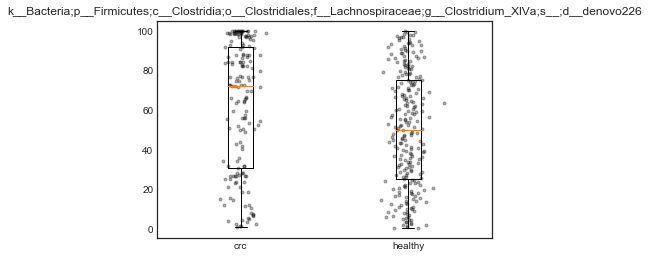

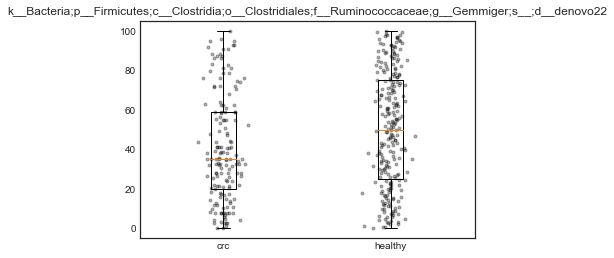

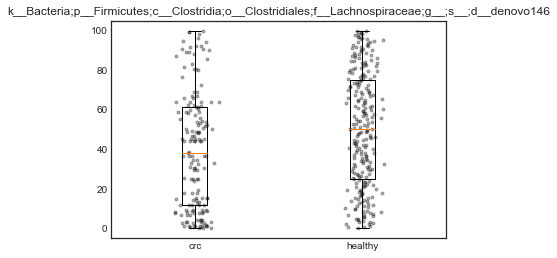

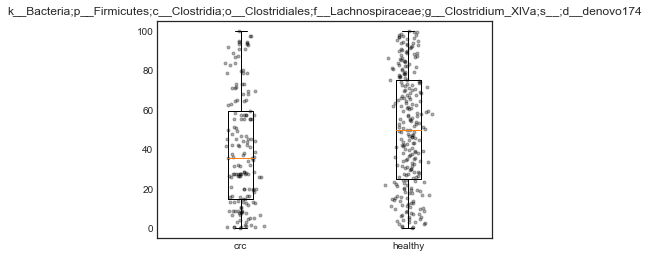

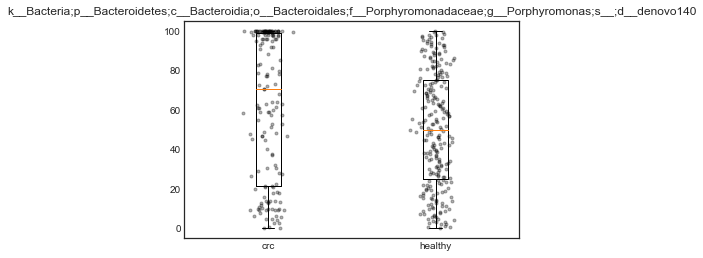

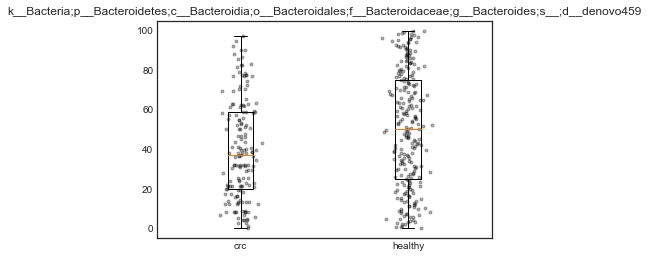

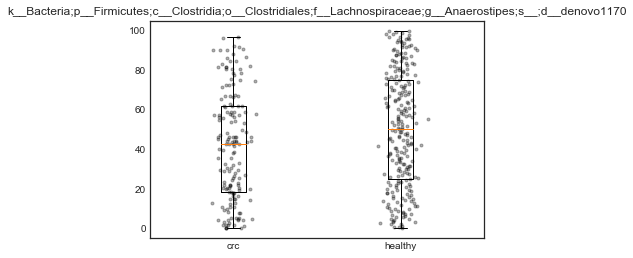

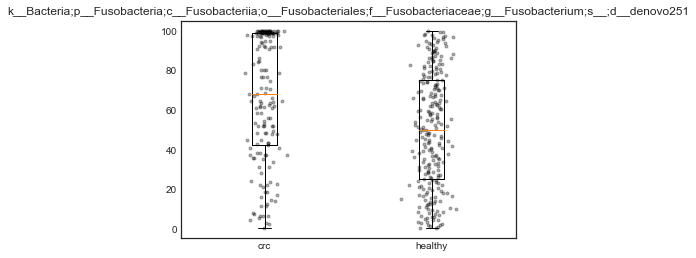

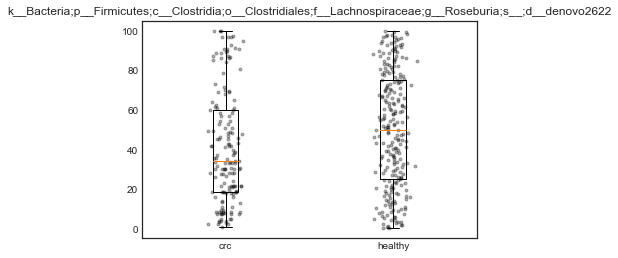

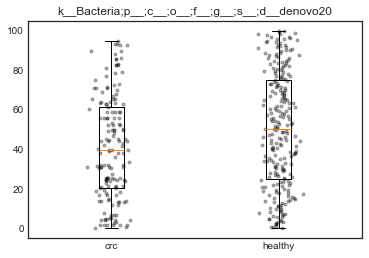

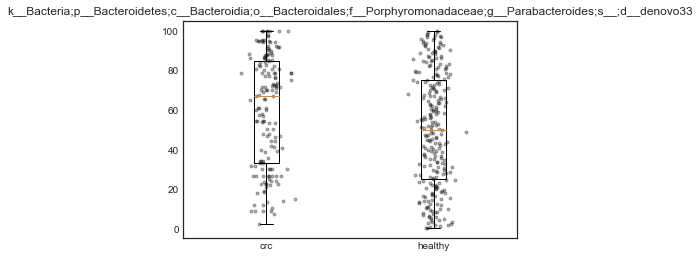

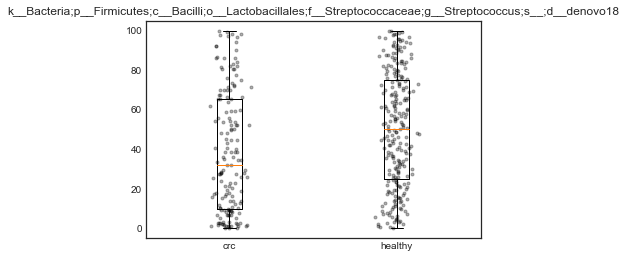

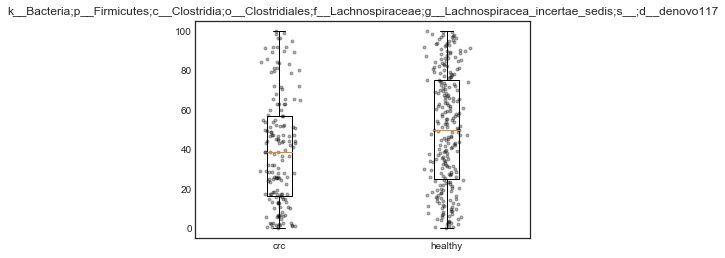

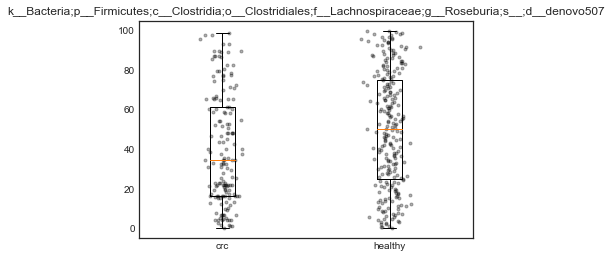

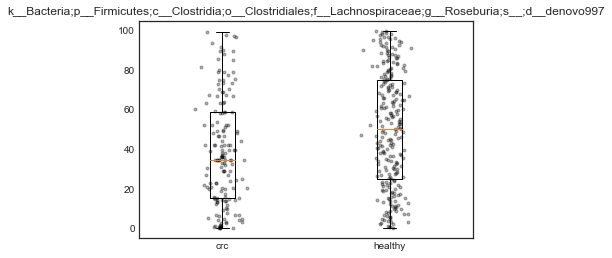

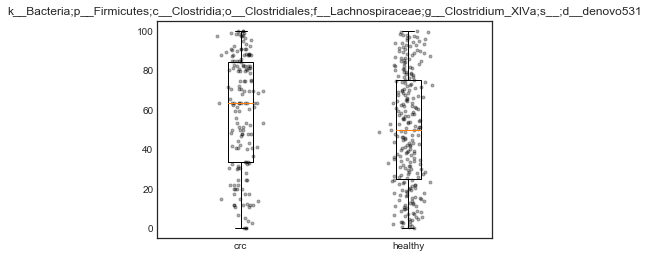

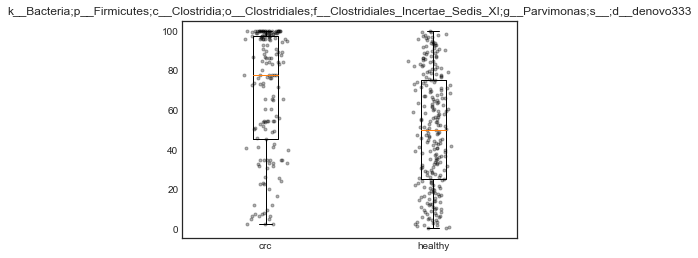

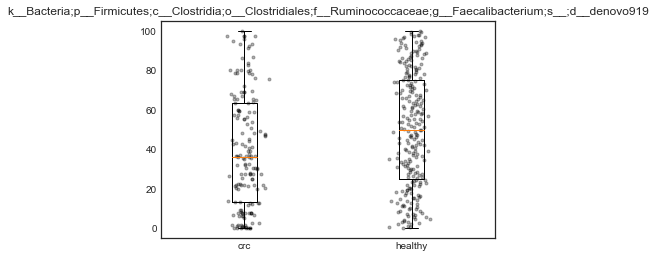

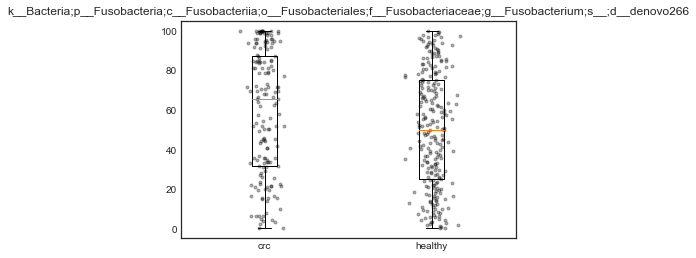

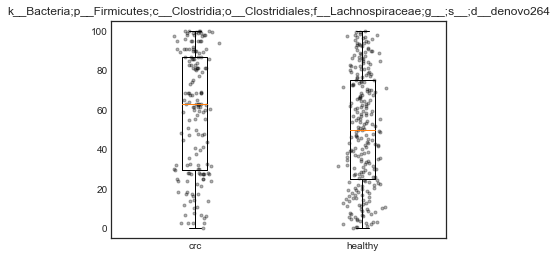

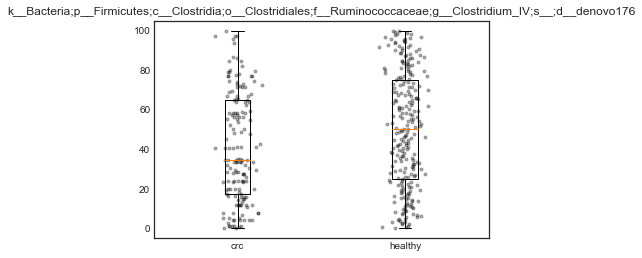

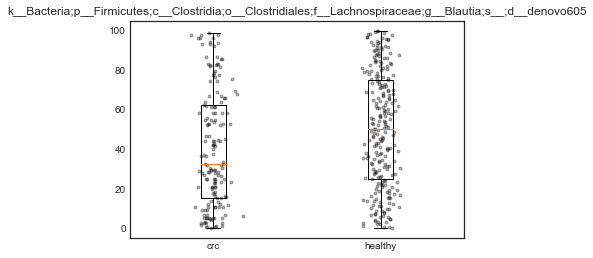

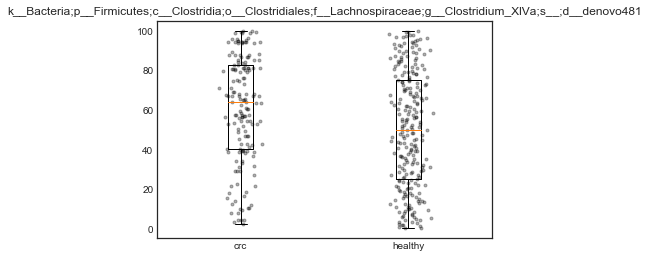

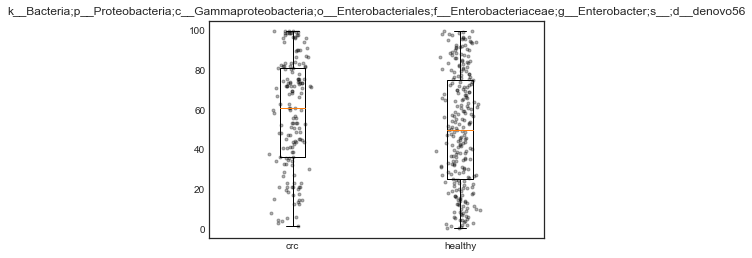

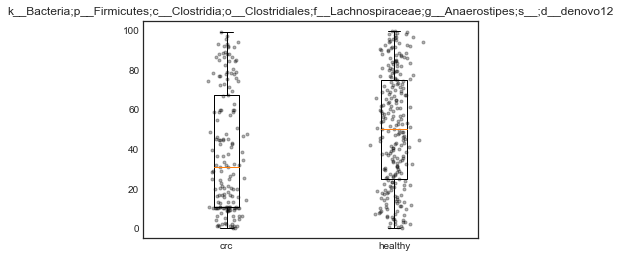

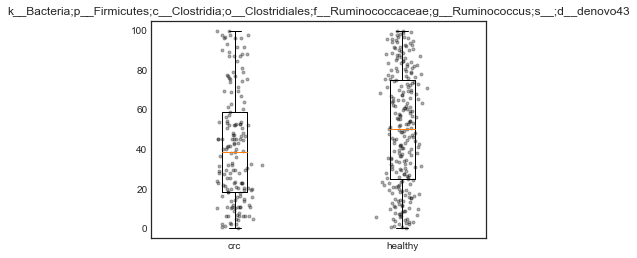

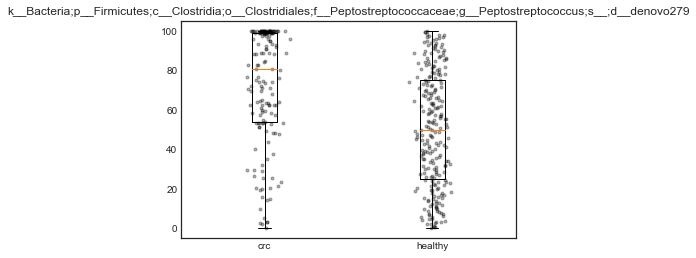

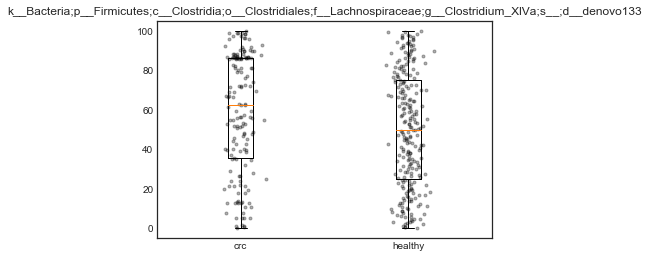

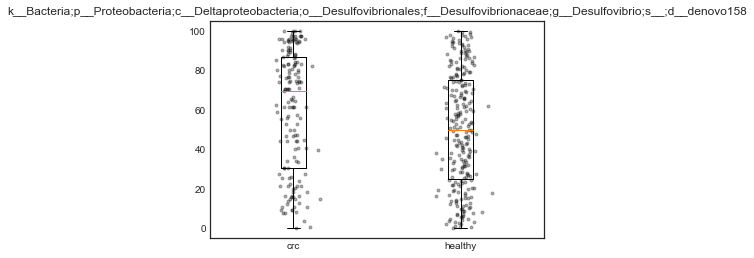

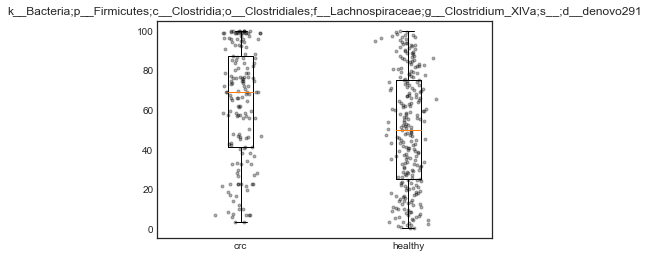

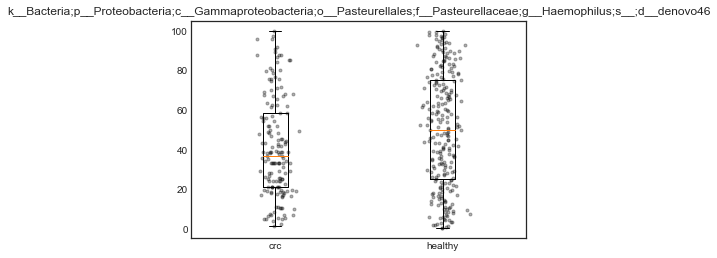

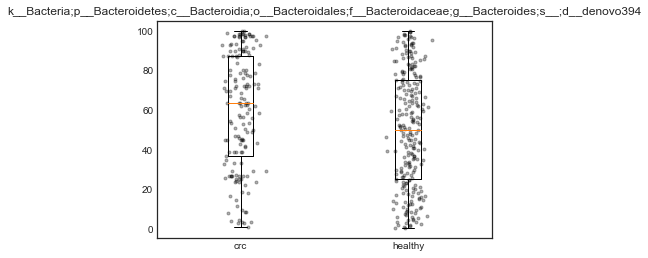

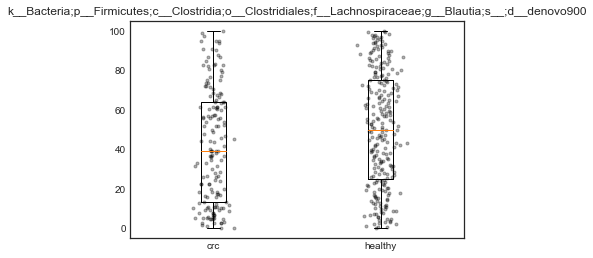

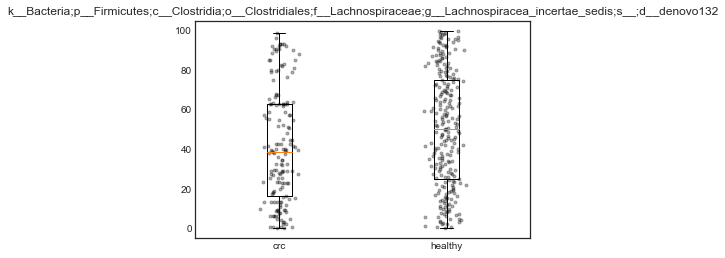

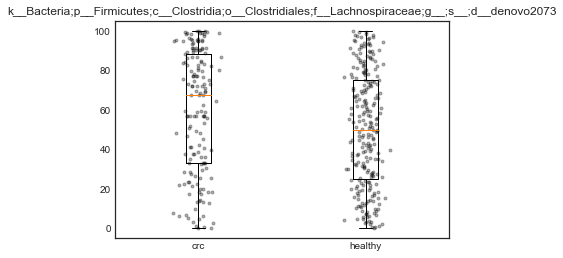

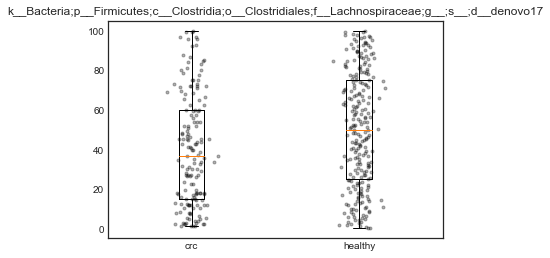

In [64]:
#sig otus percentile method
for i in range(len(sig_percentiles_otus_all_data_names)):
    data = [crc_all_data_percentiles.transpose()[sig_percentiles_otus_all_data_names[i]],
            h_all_data_percentiles.transpose()[sig_percentiles_otus_all_data_names[i]]]
    plt.boxplot(data)
    plt.title(sig_percentiles_otus_all_data_names[i])
    for j in [1,2]:
        y = []
        x = []
        y = data[j-1]
        x = np.random.normal(j, 0.05, len(y))
        plt.plot(x, y, 'k.',alpha=0.3)
    plt.xticks([1,2],['crc','healthy'])
    plt.show()

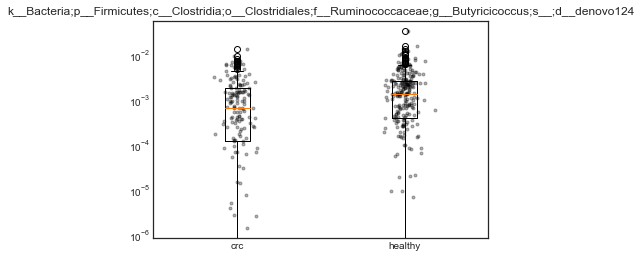

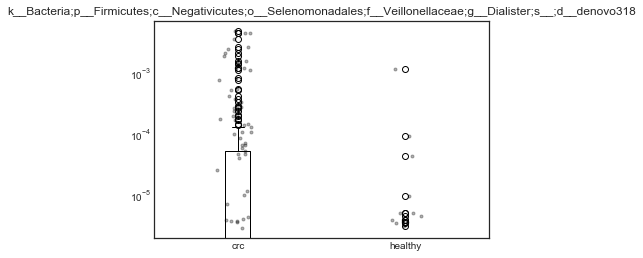

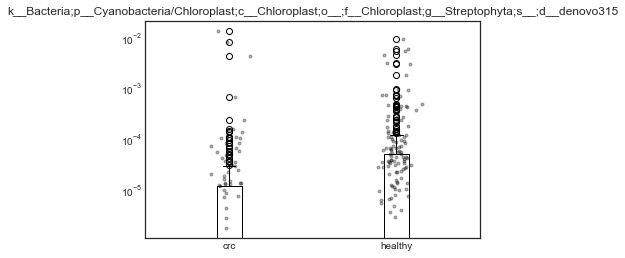

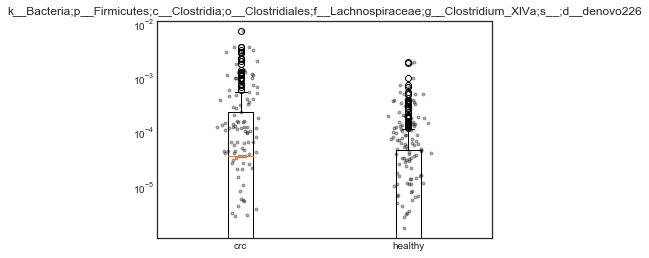

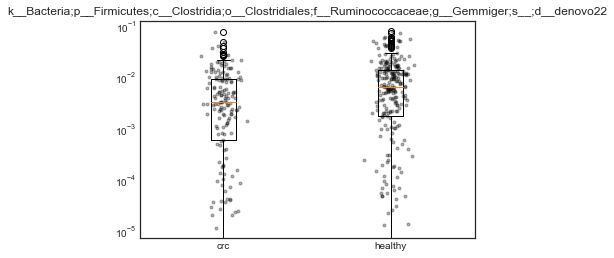

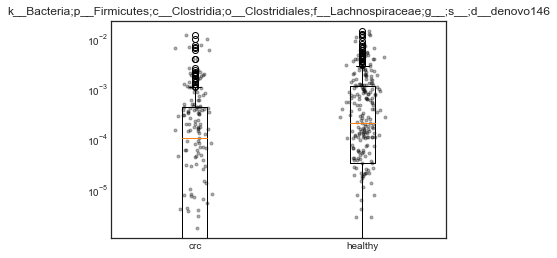

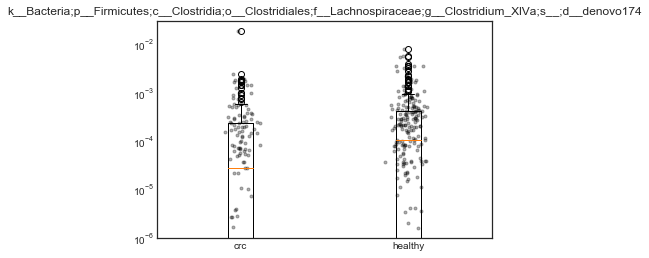

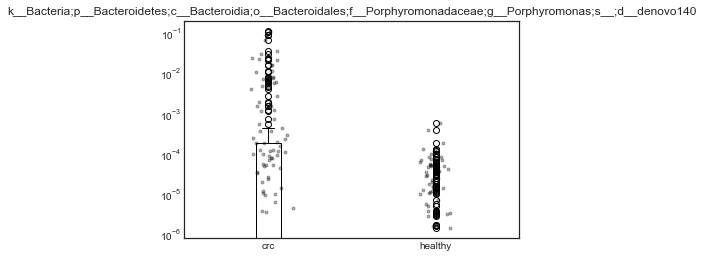

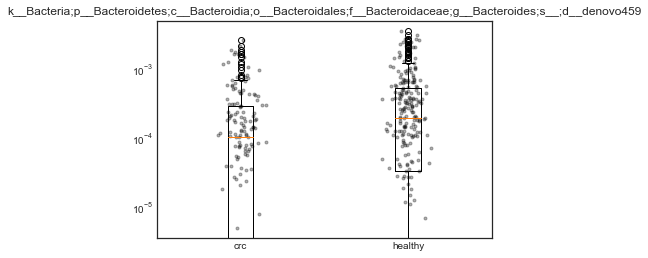

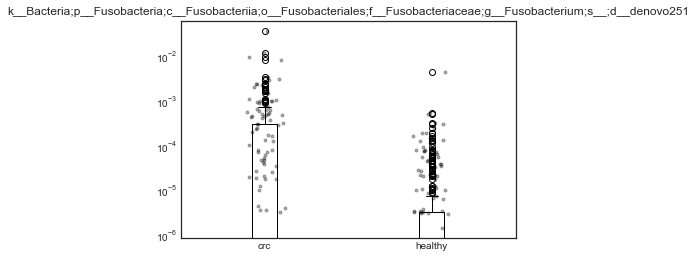

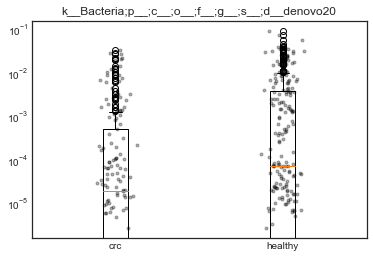

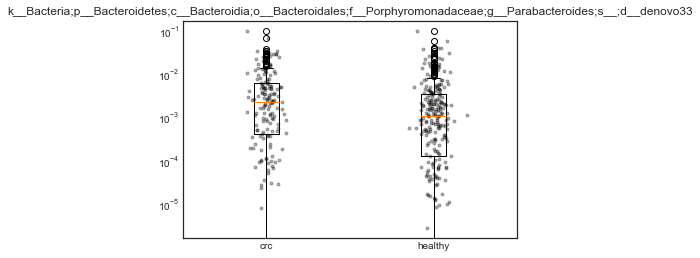

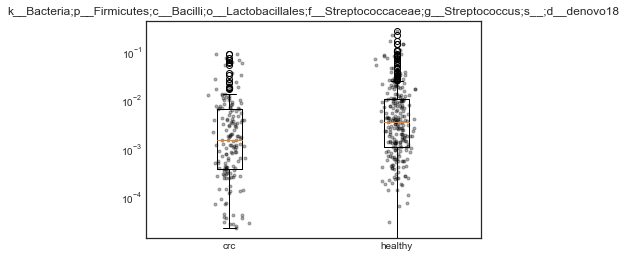

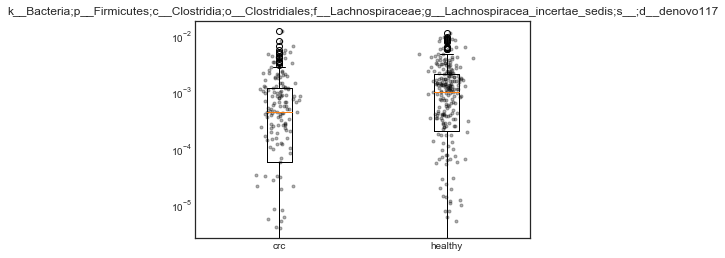

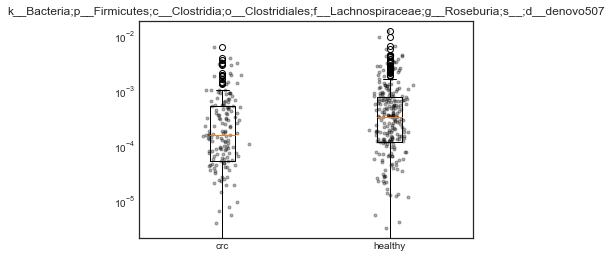

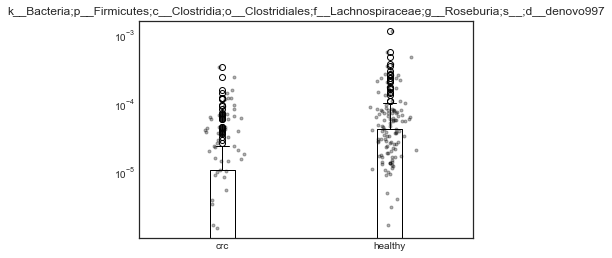

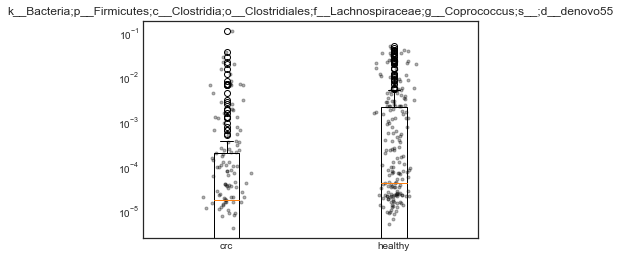

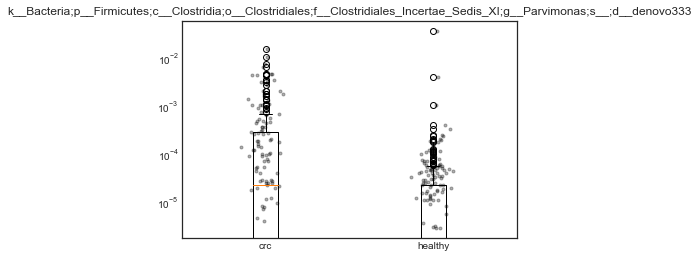

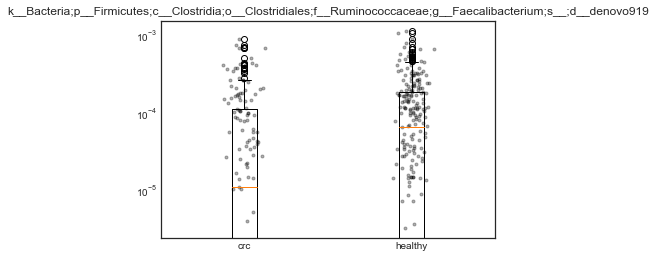

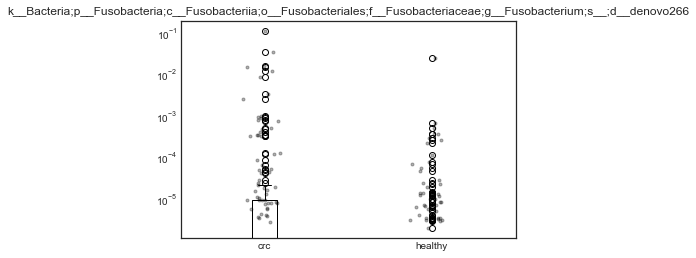

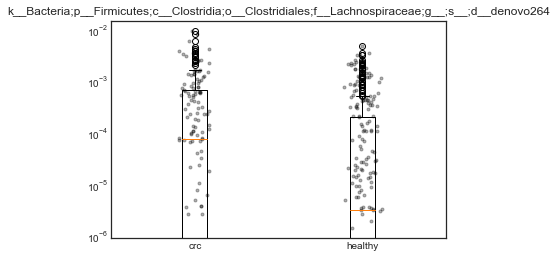

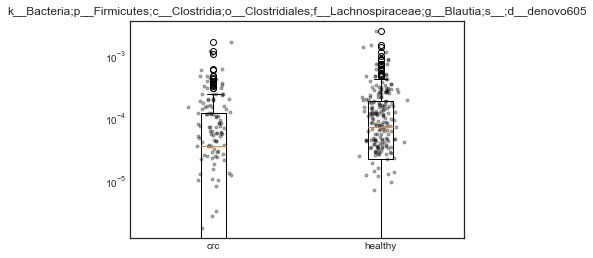

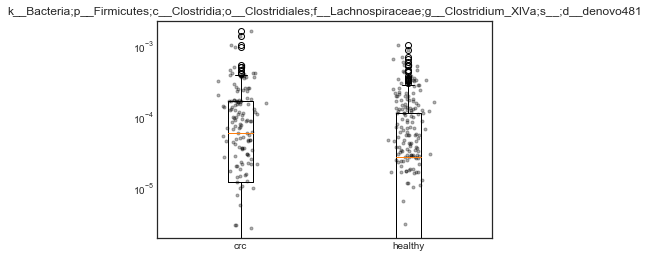

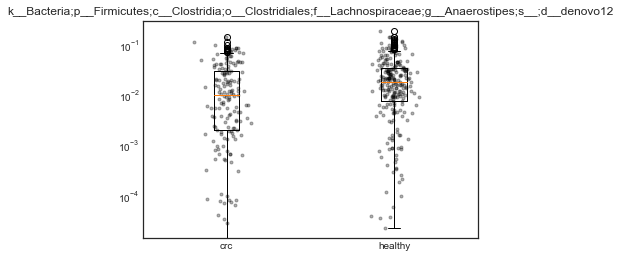

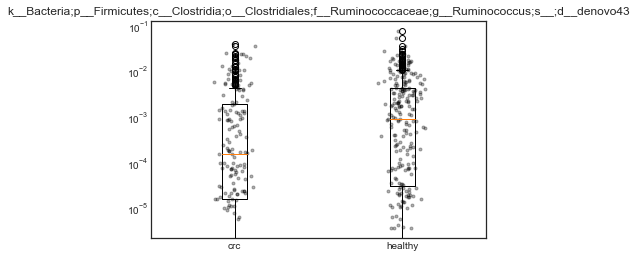

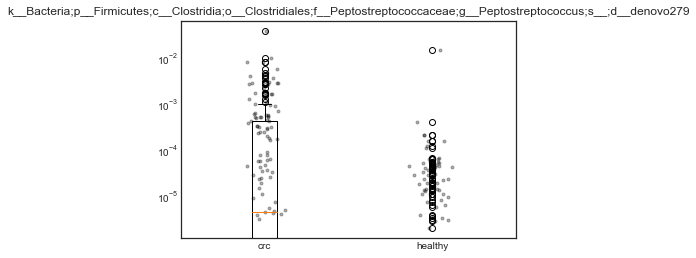

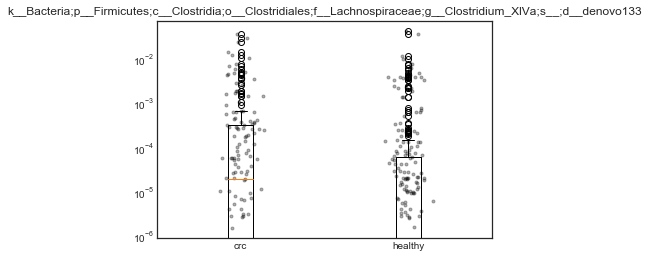

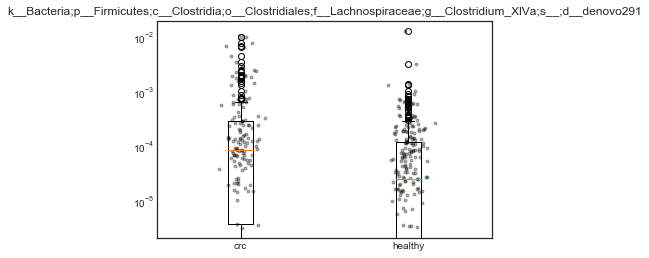

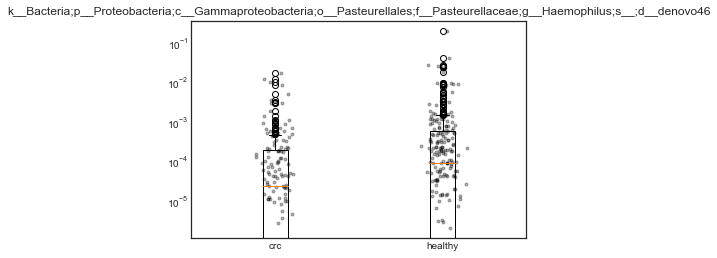

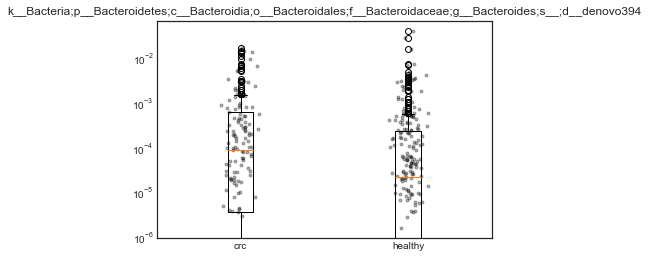

In [65]:
#sig otus raw
for i in range(len(sig_raw_otus_all_data_names)):
    data = [crc_all_data_raw.transpose()[sig_raw_otus_all_data_names[i]],
            h_all_data_raw.transpose()[sig_raw_otus_all_data_names[i]]]
    plt.boxplot(data)
    plt.title(sig_raw_otus_all_data_names[i])
    for j in [1,2]:
        y = []
        x = []
        y = data[j-1]
        x = np.random.normal(j, 0.05, len(y))
        plt.plot(x, y, 'k.',alpha=0.3)
    plt.xticks([1,2],['crc','healthy'])
    plt.yscale('log')
    plt.show()

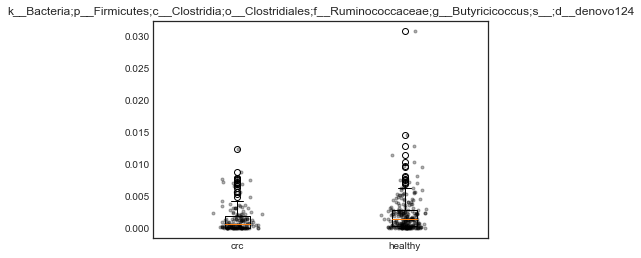

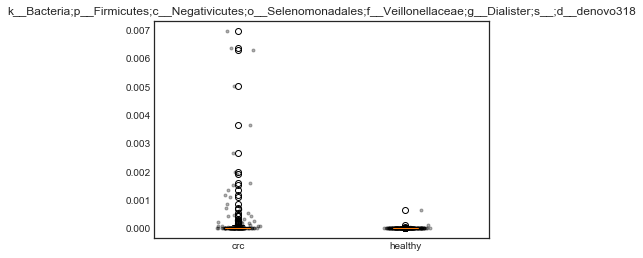

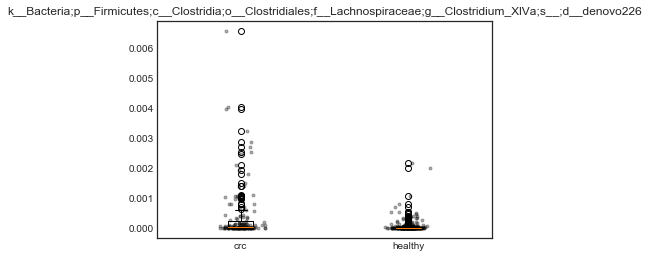

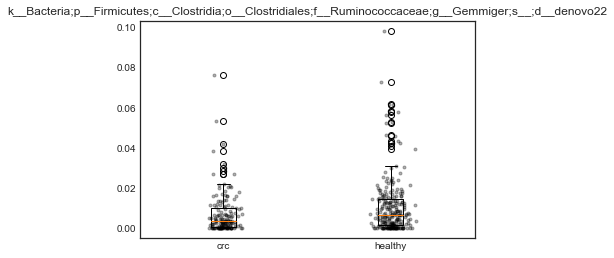

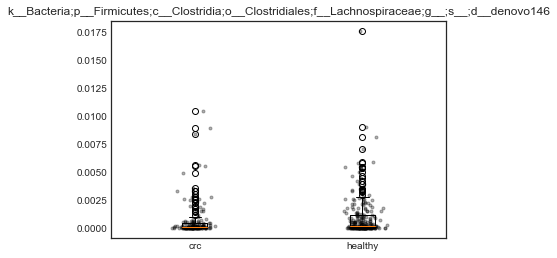

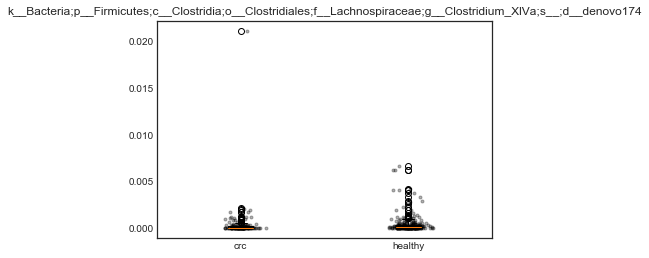

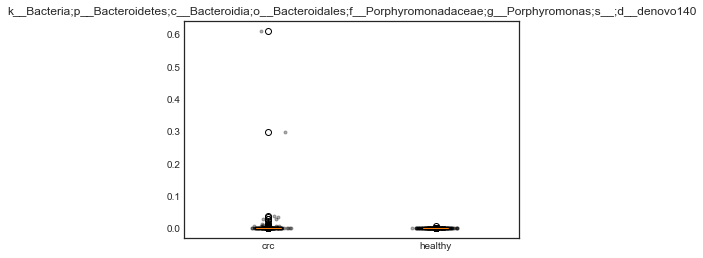

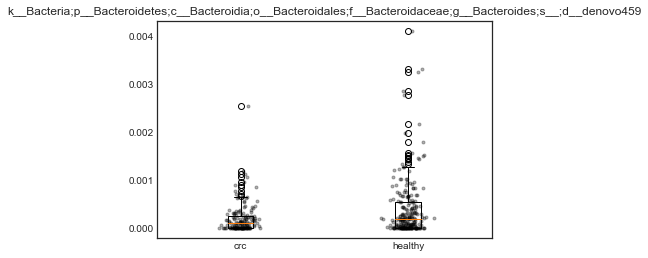

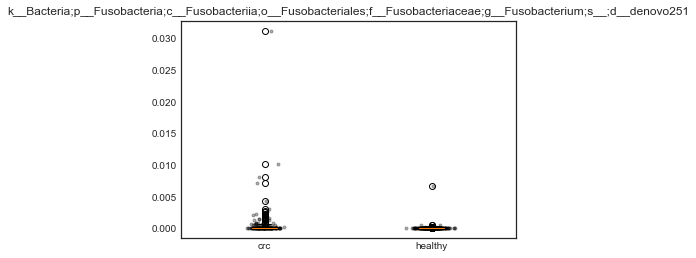

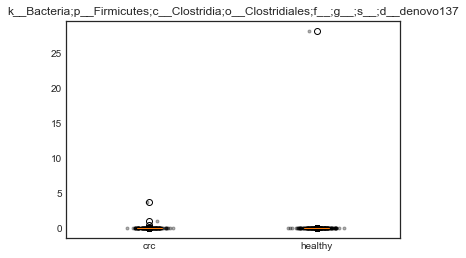

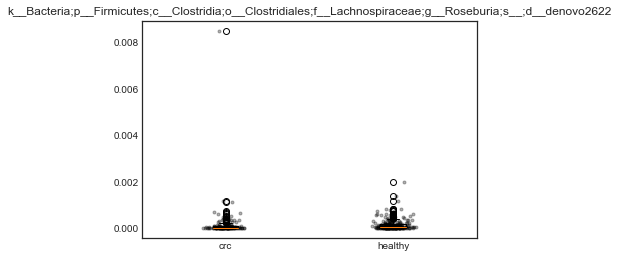

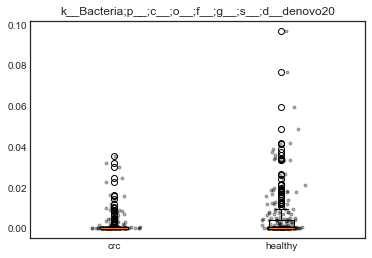

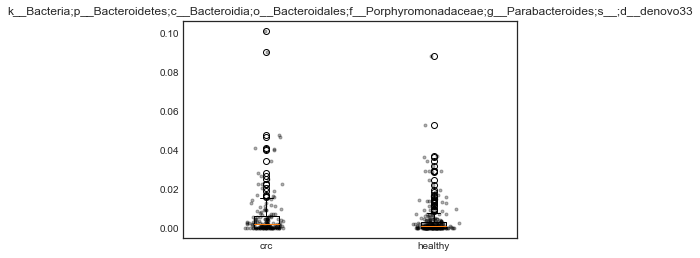

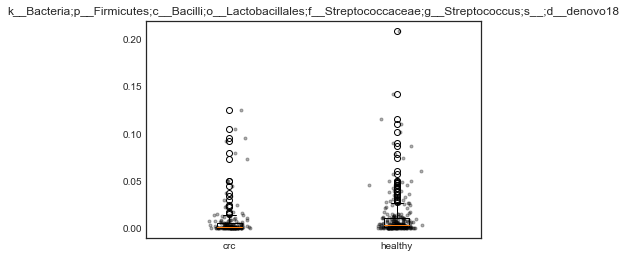

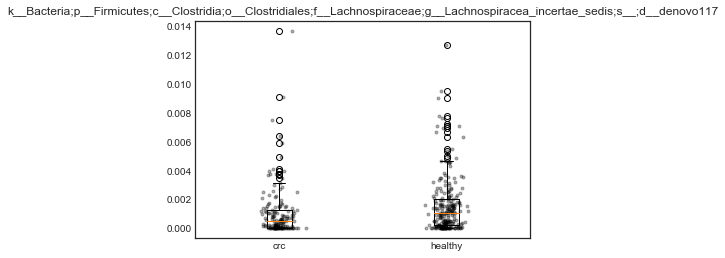

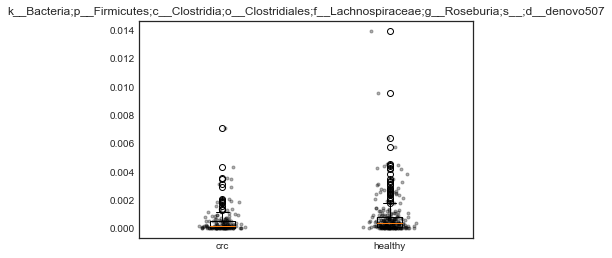

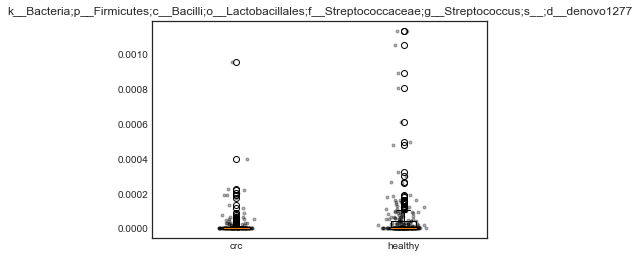

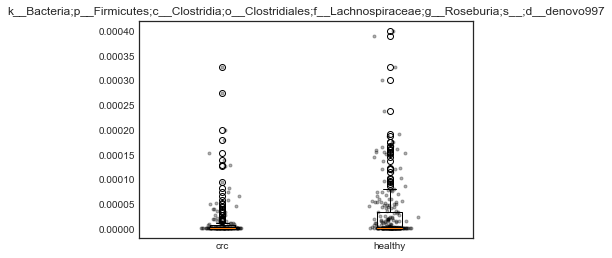

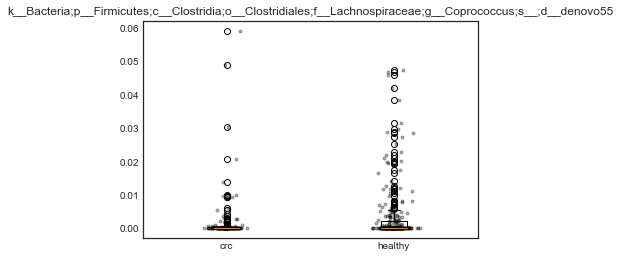

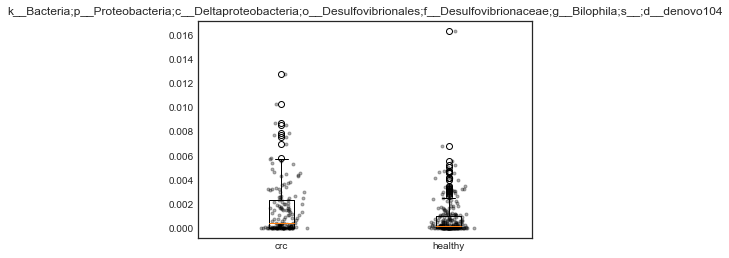

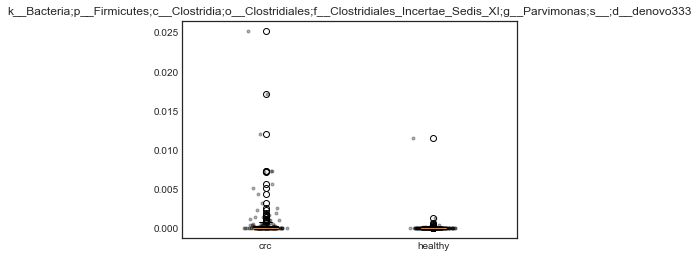

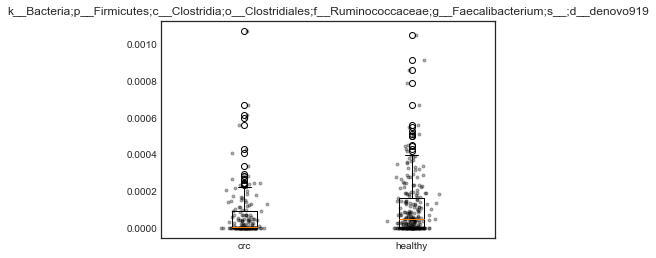

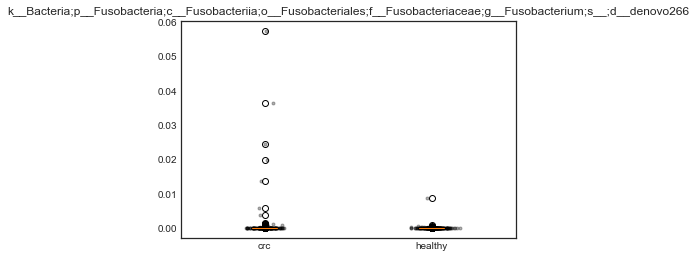

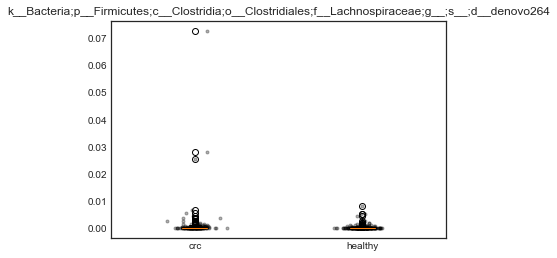

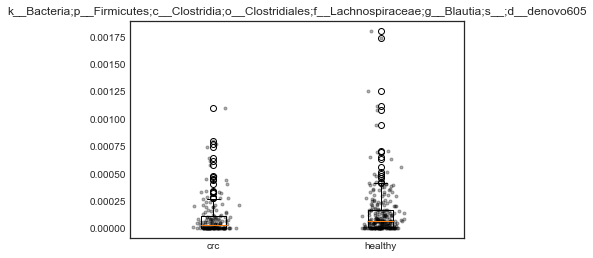

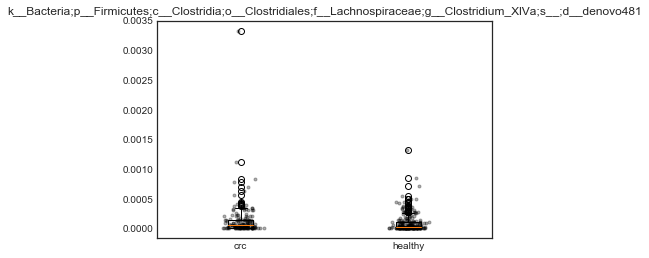

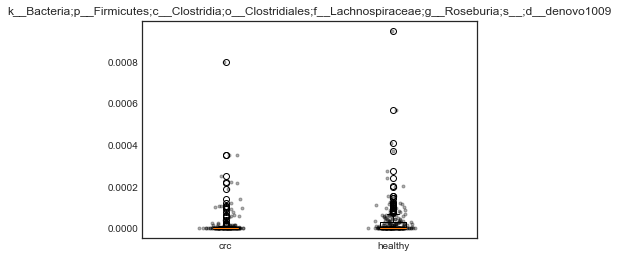

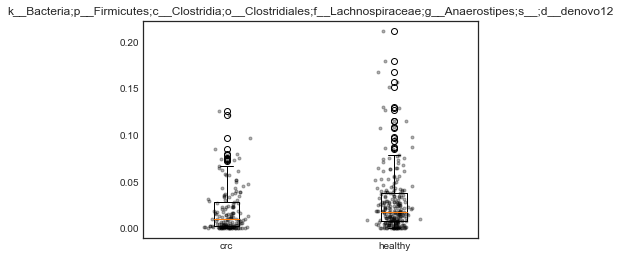

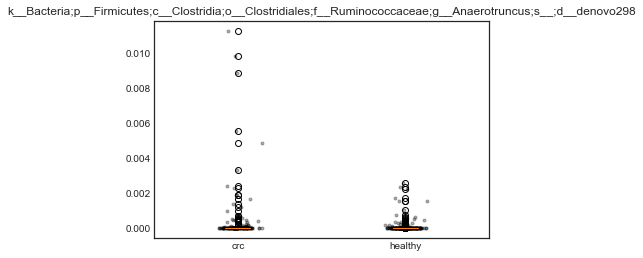

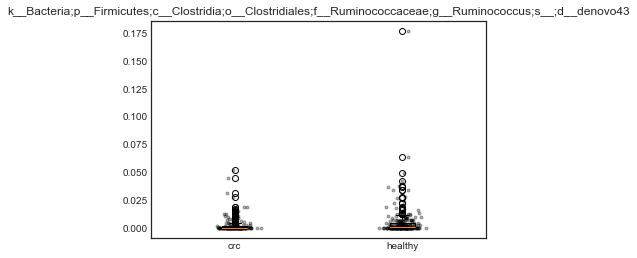

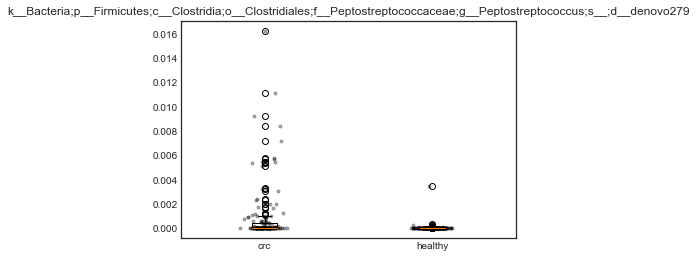

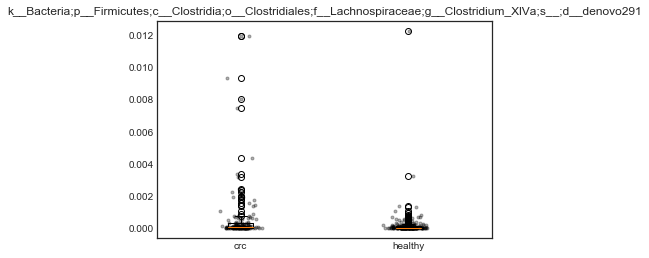

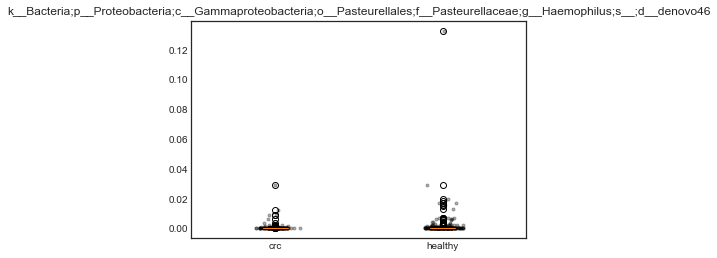

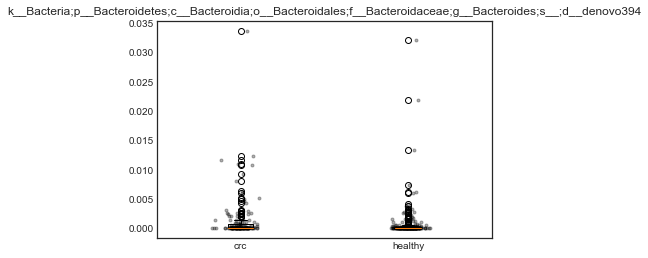

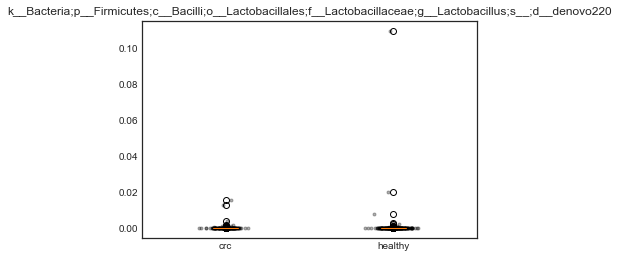

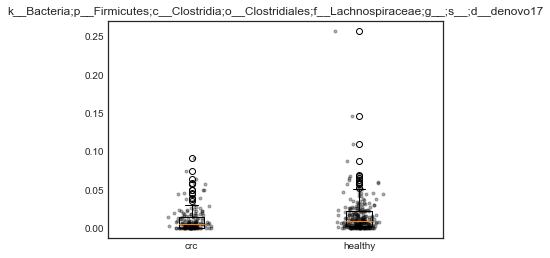

In [66]:
#sig otus combat method
for i in range(len(sig_combat_otus_all_data_names)):
    data = [crc_all_data_combat.transpose()[sig_combat_otus_all_data_names[i]],
            h_all_data_combat.transpose()[sig_combat_otus_all_data_names[i]]]
    plt.boxplot(data)
    plt.title(sig_combat_otus_all_data_names[i])
    for j in [1,2]:
        y = []
        x = []
        y = data[j-1]
        x = np.random.normal(j, 0.05, len(y))
        plt.plot(x, y, 'k.',alpha=0.3)
    plt.xticks([1,2],['crc','healthy'])
    plt.show()

In [132]:
count = 0.0
for i in range(len(zeller_pvals_fdr_raw_data_nans)):
    if pd.isnull(baxter_pvals_fdr_raw_data_nans[i]) == True:
        count = count +1.0
        
print(count)

708.0


In [133]:
pvals_info_concat = pd.concat([baxter_pvals_percentiles_data,zeller_pvals_percentiles_data],axis=1)
pvals_info_concat.columns = ['baxter_f','baxter_p','zeller_f','zeller_p']
pvals_info_concat_f = pvals_info_concat.copy()[list(['baxter_f','zeller_f'])]
pvals_info_concat_p = pvals_info_concat.copy()[list(['baxter_p','zeller_p'])]
pvals_info_concat_p_nans = pvals_info_concat_p.copy()
pvals_info_concat_p_nans[pvals_info_concat_p_nans <= 0.05] = 1.0
pvals_info_concat_p_nans[pvals_info_concat_p_nans < 1.0] = -1.0
pvals_info_concat_p_nans = pvals_info_concat_p_nans.replace(-1.0,np.nan)
pvals_info_concat_f_nans = pvals_info_concat_f.copy()
for i in range(pvals_info_concat_f.shape[0]):
    for x in range(pvals_info_concat_f.shape[1]):
        pvals_info_concat_f_nans.iloc[i,x] = pvals_info_concat_p_nans.iloc[i,x] * pvals_info_concat_f.iloc[i,x]

In [134]:
crc_fisher_fdr_all_raw = []

for i in range(len(baxter_pvals_fdr_raw_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([baxter_pvals_fdr_raw_data_nans[i],zeller_pvals_fdr_raw_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                crc_fisher_fdr_all_raw.append(sp.stats.combine_pvalues(np.array(data.dropna()))[1])
    else:
        crc_fisher_fdr_all_raw.append(np.nan)
        
fisher_crc_sigcount_raw_all = []
for i in range(len(crc_fisher_fdr_all_raw)):
    if crc_fisher_fdr_all_raw[i] <= 0.05:
        fisher_crc_sigcount_raw_all.append(baxter_pvals_fdr_raw_data_nans.index[i])
print(fisher_crc_sigcount_raw_all)
print(len(fisher_crc_sigcount_raw_all))

crc_fisher_fdr_all_percentiles = []

for i in range(len(baxter_pvals_percentiles_fdr_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([baxter_pvals_percentiles_fdr_data_nans[i],zeller_pvals_percentiles_fdr_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                crc_fisher_fdr_all_percentiles.append(sp.stats.combine_pvalues(np.array(data.dropna()))[1])
    else:
        crc_fisher_fdr_all_percentiles.append(np.nan)
        
fisher_crc_sigcount_percentiles_all = []
for i in range(len(crc_fisher_fdr_all_percentiles)):
    if crc_fisher_fdr_all_percentiles[i] <= 0.05:
        fisher_crc_sigcount_percentiles_all.append(baxter_pvals_percentiles_fdr_data_nans.index[i])
print(fisher_crc_sigcount_percentiles_all)
print(len(fisher_crc_sigcount_percentiles_all))

crc_fisher_fdr_all_combat = []

for i in range(len(baxter_pvals_fdr_combat_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([baxter_pvals_fdr_combat_data_nans[i],zeller_pvals_fdr_combat_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                crc_fisher_fdr_all_combat.append(sp.stats.combine_pvalues(np.array(data.dropna()))[1])
    else:
        crc_fisher_fdr_all_combat.append(np.nan)
        
fisher_crc_sigcount_combat_all = []
for i in range(len(crc_fisher_fdr_all_combat)):
    if crc_fisher_fdr_all_combat[i] <= 0.05:
        fisher_crc_sigcount_combat_all.append(baxter_pvals_fdr_combat_data_nans.index[i])
print(fisher_crc_sigcount_combat_all)
print(len(fisher_crc_sigcount_combat_all))

crc_fisher_fdr_all_limma = []

for i in range(len(baxter_pvals_fdr_limma_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([baxter_pvals_fdr_limma_data_nans[i],zeller_pvals_fdr_limma_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                crc_fisher_fdr_all_limma.append(sp.stats.combine_pvalues(np.array(data.dropna()))[1])
    else:
        crc_fisher_fdr_all_limma.append(np.nan)
        
fisher_crc_sigcount_limma_all = []
for i in range(len(crc_fisher_fdr_all_limma)):
    if crc_fisher_fdr_all_limma[i] <= 0.05:
        fisher_crc_sigcount_limma_all.append(baxter_pvals_fdr_limma_data_nans.index[i])
print(fisher_crc_sigcount_limma_all)
print(len(fisher_crc_sigcount_limma_all))

['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo226', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo291', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo18']
7
['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f

In [135]:
#print(fisher_crc_sigcount_limma_all)

In [136]:
#look at overlap between fisher and percentile
fisher_list_raw = []
fisher_list_percent = []

for x in fisher_crc_sigcount_raw_all:
    fisher_list_raw.append(x)
    
for x in fisher_crc_sigcount_percentiles_all:
    fisher_list_percent.append(x)

print('percentile vs. fisher raw')
print(fisher_list_raw)
print('\n')
print(set(sig_percentiles_otus_all_data_names).intersection(fisher_list_raw))
print(len(sig_percentiles_otus_all_data_names),len(fisher_list_raw),
      len(list(set(sig_percentiles_otus_all_data_names).intersection(fisher_list_raw))))
print(fisher_list_raw)
print('\n')

print('\npercentile vs. fisher percentile')
print(set(sig_percentiles_otus_all_data_names).intersection(fisher_list_percent))
print(len(sig_percentiles_otus_all_data_names),len(fisher_list_percent),
      len(list(set(sig_percentiles_otus_all_data_names).intersection(fisher_list_percent))))
print(fisher_list_percent)
print('\n')

print('\npercentile vs. raw')
print(set(sig_percentiles_otus_all_data_names).intersection(sig_raw_otus_all_data_names))
print(len(sig_percentiles_otus_all_data_names),len(sig_raw_otus_all_data_names),
      len(list(set(sig_percentiles_otus_all_data_names).intersection(sig_raw_otus_all_data_names))))

percentile vs. fisher raw
['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo226', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo291', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo18']


{'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo291', 'k__Bacteria;p__Firmicutes;c

In [137]:
crc_fisher_fdr_all_limma = []
index_limma = []
for i in range(len(zeller_pvals_fdr_limma_data_nans)):
    if pd.isnull(zeller_pvals_fdr_limma_data_nans[i]) == False and pd.isnull(baxter_pvals_fdr_limma_data_nans[i]) == False :
        crc_fisher_fdr_all_limma.append(sp.stats.combine_pvalues(np.array([zeller_pvals_fdr_limma_data_nans[i],baxter_pvals_fdr_limma_data_nans[i]]))[1])
        index_limma.append(i)
#    else:
#        crc_fisher_fdr_all_limma.append(float([x for x in np.array([zeller_pvals_fdr_limma_data_nans[i],baxter_pvals_fdr_limma_data_nans[i]]) if str(x) != 'nan'][0]))
        
fisher_crc_sigcount_limma_all = []
for i in range(len(crc_fisher_fdr_all_limma)):
    if crc_fisher_fdr_all_limma[i] <= 0.05:
        fisher_crc_sigcount_limma_all.append(zeller_pvals_fdr_limma_data_nans.index[index_limma[i]])
print(fisher_crc_sigcount_limma_all)
print(len(fisher_crc_sigcount_limma_all))

['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas;s__;d__denovo140', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo226', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo291', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo18']
8


In [138]:
stouffer_weights = [sqrt(zeller_crc_data_raw.shape[1]+zeller_h_data_raw.shape[1]),
                   sqrt(baxter_crc_data_raw.shape[1]+baxter_h_data_raw.shape[1])]

crc_stouffer_fdr_all_raw = []

for i in range(len(zeller_pvals_fdr_raw_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([zeller_pvals_fdr_raw_data_nans[i],baxter_pvals_fdr_raw_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                weights = np.multiply(np.divide(data,data),stouffer_weights)
                crc_stouffer_fdr_all_raw.append(sp.stats.combine_pvalues(np.array(data.dropna()),method='stouffer',weights=np.array(weights.dropna()))[1])
    else:
        crc_stouffer_fdr_all_raw.append(np.nan)
stouffer_crc_sigcount_raw_all = []
stouffer_crc_sigcount_raw_all = []
for i in range(len(crc_stouffer_fdr_all_raw)):
    if crc_stouffer_fdr_all_raw[i] <= 0.05:
        stouffer_crc_sigcount_raw_all.append(baxter_pvals_fdr_raw_data_nans.index[i])
print(stouffer_crc_sigcount_raw_all)
print(len(stouffer_crc_sigcount_raw_all))

crc_stouffer_fdr_all_percentiles = []

for i in range(len(zeller_pvals_percentiles_fdr_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([zeller_pvals_percentiles_fdr_data_nans[i],baxter_pvals_percentiles_fdr_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                weights = np.multiply(np.divide(data,data),stouffer_weights)
                crc_stouffer_fdr_all_percentiles.append(sp.stats.combine_pvalues(np.array(data.dropna()),method='stouffer',weights=np.array(weights.dropna()))[1])
stouffer_crc_sigcount_percentiles_all = []
stouffer_crc_sigcount_percentiles_all = []
for i in range(len(crc_stouffer_fdr_all_percentiles)):
    if crc_stouffer_fdr_all_percentiles[i] <= 0.05:
        stouffer_crc_sigcount_percentiles_all.append(i)
print(stouffer_crc_sigcount_percentiles_all)
print(len(stouffer_crc_sigcount_percentiles_all))

crc_stouffer_fdr_all_combat = []

for i in range(len(zeller_pvals_fdr_combat_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([zeller_pvals_fdr_combat_data_nans[i],baxter_pvals_fdr_combat_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                weights = np.multiply(np.divide(data,data),stouffer_weights)
                crc_stouffer_fdr_all_combat.append(sp.stats.combine_pvalues(np.array(data.dropna()),method='stouffer',weights=np.array(weights.dropna()))[1])
stouffer_crc_sigcount_combat_all = []
stouffer_crc_sigcount_combat_all = []
for i in range(len(crc_stouffer_fdr_all_combat)):
    if crc_stouffer_fdr_all_combat[i] <= 0.05:
        stouffer_crc_sigcount_combat_all.append(i)
print(stouffer_crc_sigcount_combat_all)
print(len(stouffer_crc_sigcount_combat_all))

crc_stouffer_fdr_all_limma = []

for i in range(len(zeller_pvals_fdr_limma_data_nans)):
    data = None
    direction = None
    direction = pvals_info_concat_f_nans.iloc[i,:]
    if float(len(direction.dropna())) >= 2.0:
#check if all items in list are the same sign - only includes coefficients for sig p-values
        if all(item >= 0 for item in direction.dropna()) or all(item < 0 for item in direction.dropna()):
            data = pd.Series([zeller_pvals_fdr_limma_data_nans[i],baxter_pvals_fdr_limma_data_nans[i]])
            if float(len(data.dropna())) >= 2.0:
                weights = np.multiply(np.divide(data,data),stouffer_weights)
                crc_stouffer_fdr_all_limma.append(sp.stats.combine_pvalues(np.array(data.dropna()),method='stouffer',weights=np.array(weights.dropna()))[1])
stouffer_crc_sigcount_limma_all = []
stouffer_crc_sigcount_limma_all = []
for i in range(len(crc_stouffer_fdr_all_limma)):
    if crc_stouffer_fdr_all_limma[i] <= 0.05:
        stouffer_crc_sigcount_limma_all.append(i)
print(stouffer_crc_sigcount_limma_all)
print(len(stouffer_crc_sigcount_limma_all))

['k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo226', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo291', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo18']
7
[0, 3, 5, 6, 7, 8, 9, 13]
8
[0, 3, 6, 7, 8, 9, 13]
7
[0, 3, 6, 7, 8, 9, 13]
7


In [139]:
#look at overlap between stouffer and percentile
stouffer_list_raw = []
stouffer_list_percent = []

for x in stouffer_crc_sigcount_raw_all:
    stouffer_list_raw.append(x)
    
for x in stouffer_crc_sigcount_percentiles_all:
    stouffer_list_percent.append(x)

print('percentile vs. stouffer raw')
print(set(sig_percentiles_otus_all_data_names).intersection(stouffer_list_raw))
print(len(sig_percentiles_otus_all_data_names),len(stouffer_list_raw),
      len(list(set(sig_percentiles_otus_all_data_names).intersection(stouffer_list_raw))))

print('\npercentile vs. stouffer percentile')
print(set(sig_percentiles_otus_all_data_names).intersection(stouffer_list_percent))
print(len(sig_percentiles_otus_all_data_names),len(stouffer_list_percent),
      len(list(set(sig_percentiles_otus_all_data_names).intersection(stouffer_list_percent))))

print('\npercentile vs. raw')
print(set(sig_percentiles_otus_all_data_names).intersection(sig_raw_otus_all_data_names))
print(len(sig_percentiles_otus_all_data_names),len(sig_raw_otus_all_data_names),
      len(list(set(sig_percentiles_otus_all_data_names).intersection(sig_raw_otus_all_data_names))))

percentile vs. stouffer raw
{'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo291', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae;g__Peptostreptococcus;s__;d__denovo279', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Clostridium_XlVa;s__;d__denovo226', 'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo251', 'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo18', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Anaerostipes;s__;d__denovo12', 'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiales_Incertae_Sedis_XI;g__Parvimonas;s__;d__denovo333'}
39 7 7

percentile vs. stouffer percentile
set()
39 8 0

percentile vs. raw
{'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnos

In [140]:
sig_otus_within_studies = list(set(sig_percentiles_otus_zeller_data_names + 
                                  sig_percentiles_otus_baxter_data_names ))

list_within_otu_sig = [set(sig_percentiles_otus_zeller_data_names), set(sig_percentiles_otus_baxter_data_names)]

sig_otus_within_studies_consistent = set.intersection(*list_within_otu_sig)
print(len(sig_otus_within_studies))
print(len(sig_otus_within_studies_consistent))

31
4


In [141]:
print(zeller_h_data_raw.shape)
print(zeller_crc_data_raw.shape)
print(baxter_h_data_raw.shape)
print(baxter_crc_data_raw.shape)

(1021, 75)
(1021, 41)
(1021, 172)
(1021, 120)


In [142]:
#test various combinations of controls vs. sig otus
#remove OTUs that occur in fewer than a quarter of samples

fractions = [0, 5, 10, 15, 20, 25, 30, 35, 40]
#fractions = [0, 5, 10, 15, 20]

iter_raw_bz = {}
iter_percent_bz = {}
iter_combat_bz = {}
iter_limma_bz = {}

baxter_titrate_zeller_names = {}
baxter_titrate_zeller_fdr = {}
baxter_titrate_zeller_names_percent = {}
baxter_titrate_zeller_fdr_percent = {}
baxter_titrate_zeller_names_combat = {}
baxter_titrate_zeller_fdr_combat = {}
baxter_titrate_zeller_names_limma = {}
baxter_titrate_zeller_fdr_limma = {}
for n in range(5):
    for x in fractions:
        healthy_col1 = zeller_h_data_raw.sample(n=x,axis=1).columns
        healthy_col2 = baxter_h_data_raw.sample(n=fractions[-1]-x,axis=1).columns
        crc_col = baxter_crc_data_raw.sample(n=fractions[-1],axis=1).columns
        healthy = pd.concat([zeller_h_data_raw[list(healthy_col1)],baxter_h_data_raw[list(healthy_col2)]],axis=1)
        crc = baxter_crc_data_raw[list(crc_col)]
        healthy_percent = pd.concat([zeller_h_data_percentiles[list(healthy_col1)],baxter_h_data_percentiles[list(healthy_col2)]],axis=1)
        crc_percent = baxter_crc_data_percentiles[list(crc_col)]

        crc_combat = baxter_crc_data_combat[list(crc_col)]
        healthy_combat = pd.concat([zeller_h_data_combat[list(healthy_col1)],baxter_h_data_combat[list(healthy_col2)]],axis=1)
        crc_limma = baxter_crc_data_limma[list(crc_col)]
        healthy_limma = pd.concat([zeller_h_data_limma[list(healthy_col1)],baxter_h_data_limma[list(healthy_col2)]],axis=1)

        pvals = []
        pvals_percent = []
        pvals_combat = []
        pvals_limma = []
    
        for i in range(crc.shape[0]):
            if crc.iloc[i,:].astype(bool).sum()/float(crc.shape[1]) >= 1/3.0 or healthy.iloc[i,:].astype(bool).sum()/float(healthy.shape[1]) >= 1/3.0:
                pvals.append(sp.stats.ranksums(crc.iloc[i,:],healthy.iloc[i,:])[1])
#            else:
#                pvals.append(np.random.random(1))

        for i in range(crc_percent.shape[0]):
            if crc_percent.iloc[i,:].astype(bool).sum()/float(crc_percent.shape[1]) >= 1/3.0 or healthy_percent.iloc[i,:].astype(bool).sum()/float(healthy_percent.shape[1]) >= 1/3.0:
                pvals_percent.append(sp.stats.ranksums(crc_percent.iloc[i,:],healthy_percent.iloc[i,:])[1])
#            else:
#                pvals_percent.append(np.random.random(1))
            
        for i in range(crc_combat.shape[0]):
            if crc_combat.iloc[i,:].astype(bool).sum()/float(crc_combat.shape[1]) >= 1/3.0 or healthy_combat.iloc[i,:].astype(bool).sum()/float(healthy_combat.shape[1]) >= 1/3.0:
                pvals_combat.append(sp.stats.ranksums(crc_combat.iloc[i,:],healthy_combat.iloc[i,:])[1])
#            else:
#                pvals_combat.append(np.random.random(1))
    
        for i in range(crc_limma.shape[0]):
            if crc_limma.iloc[i,:].astype(bool).sum()/float(crc_limma.shape[1]) >= 1/3.0 or healthy_limma.iloc[i,:].astype(bool).sum()/float(healthy_limma.shape[1]) >= 1/3.0:
                pvals_limma.append(sp.stats.ranksums(crc_limma.iloc[i,:],healthy_limma.iloc[i,:])[1])
#            else:
#                pvals_limma.append(np.random.random(1))  
    
        pvals = np.array(pvals)
        pvals_fdr = sm.sandbox.stats.multicomp.multipletests(np.array(pvals),alpha=0.05,method='fdr_bh')[1]
        pvals_percent = np.array(pvals_percent)
        pvals_fdr_percent = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_percent),alpha=0.05,method='fdr_bh')[1]
        pvals_combat = np.array(pvals_combat)
        pvals_fdr_combat = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_combat),alpha=0.05,method='fdr_bh')[1]
        pvals_limma = np.array(pvals_limma)
        pvals_fdr_limma = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_limma),alpha=0.05,method='fdr_bh')[1]
        names = []
        fdr = []
        names_percent = []
        fdr_percent = []
        names_combat = []
        fdr_combat = []
        names_limma = []
        fdr_limma = []
        for j in range(len(pvals_fdr)):
            if pvals_fdr[j] <= 0.05:
                names.append(crc.index[j])
                fdr.append(pvals_fdr[j])
            if pvals_fdr_percent[j] <= 0.05:
                names_percent.append(pvals_fdr_percent[j])
                fdr_percent.append(pvals_fdr_percent)
            if pvals_fdr_combat[j] <= 0.05:
                names_combat.append(pvals_fdr_combat[j])
                fdr_combat.append(pvals_fdr_combat)
            if pvals_fdr_limma[j] <= 0.05:
                names_limma.append(pvals_fdr_limma[j])
                fdr_limma.append(pvals_fdr_limma)
            
        baxter_titrate_zeller_names[x] = names
        baxter_titrate_zeller_fdr[x] = fdr
        baxter_titrate_zeller_names_percent[x] = names_percent
        baxter_titrate_zeller_fdr_percent[x] = fdr_percent
        baxter_titrate_zeller_names_combat[x] = names_combat
        baxter_titrate_zeller_fdr_combat[x] = fdr_combat
        baxter_titrate_zeller_names_limma[x] = names_limma
        baxter_titrate_zeller_fdr_limma[x] = fdr_limma
    iter_raw_bz[n] = baxter_titrate_zeller_fdr
    iter_percent_bz[n] = baxter_titrate_zeller_fdr_percent
    iter_combat_bz[n] = baxter_titrate_zeller_fdr_combat
    iter_limma_bz[n] = baxter_titrate_zeller_fdr_limma


    


In [143]:
#test various combinations of controls vs. sig otus
#remove OTUs that occur in fewer than a quarter of samples
iter_raw_zb = {}
iter_percent_zb = {}
iter_combat_zb = {}
iter_limma_zb = {}

fractions = [0, 5, 10, 15, 20, 25, 30, 35, 40]
#fractions = [0, 5, 10, 15, 20]

zeller_titrate_baxter_names = {}
zeller_titrate_baxter_fdr = {}
zeller_titrate_baxter_names_percent = {}
zeller_titrate_baxter_fdr_percent = {}
zeller_titrate_baxter_names_combat = {}
zeller_titrate_baxter_fdr_combat = {}
zeller_titrate_baxter_names_limma = {}
zeller_titrate_baxter_fdr_limma = {}

for n in range(5):
    for x in fractions:
        healthy_col1 = baxter_h_data_raw.sample(n=x,axis=1).columns
        healthy_col2 = zeller_h_data_raw.sample(n=fractions[-1]-x,axis=1).columns
        crc_col = zeller_crc_data_raw.sample(n=fractions[-1],axis=1).columns
        healthy = pd.concat([baxter_h_data_raw[list(healthy_col1)],zeller_h_data_raw[list(healthy_col2)]],axis=1)
        crc = zeller_crc_data_raw[list(crc_col)]
        healthy_percent = pd.concat([baxter_h_data_percentiles[list(healthy_col1)],zeller_h_data_percentiles[list(healthy_col2)]],axis=1)
        crc_percent = zeller_crc_data_percentiles[list(crc_col)]
        crc_combat = zeller_crc_data_combat[list(crc_col)]
        healthy_combat = pd.concat([baxter_h_data_combat[list(healthy_col1)],zeller_h_data_combat[list(healthy_col2)]],axis=1)
        crc_limma = zeller_crc_data_limma[list(crc_col)]
        healthy_limma = pd.concat([baxter_h_data_limma[list(healthy_col1)],zeller_h_data_limma[list(healthy_col2)]],axis=1)

        pvals = []
        pvals_percent = []
        pvals_combat = []
        pvals_limma = []
        for i in range(crc.shape[0]):
            if crc.iloc[i,:].astype(bool).sum()/float(crc.shape[1]) >= 1/3.0 or healthy.iloc[i,:].astype(bool).sum()/float(healthy.shape[1]) >= 1/3.0:
                pvals.append(sp.stats.ranksums(crc.iloc[i,:],healthy.iloc[i,:])[1])
#            else:
#                pvals.append(np.random.random(1))

        for i in range(crc_percent.shape[0]):
            if crc_percent.iloc[i,:].astype(bool).sum()/float(crc_percent.shape[1]) >= 1/3.0 or healthy_percent.iloc[i,:].astype(bool).sum()/float(healthy_percent.shape[1]) >= 1/3.0:
                pvals_percent.append(sp.stats.ranksums(crc_percent.iloc[i,:],healthy_percent.iloc[i,:])[1])
#            else:
#                pvals_percent.append(np.random.random(1))
            
        for i in range(crc_combat.shape[0]):
            if crc_combat.iloc[i,:].astype(bool).sum()/float(crc_combat.shape[1]) >= 1/3.0 or healthy_combat.iloc[i,:].astype(bool).sum()/float(healthy_combat.shape[1]) >= 1/3.0:
                pvals_combat.append(sp.stats.ranksums(crc_combat.iloc[i,:],healthy_combat.iloc[i,:])[1])
#            else:
#                pvals_combat.append(np.random.random(1))

        for i in range(crc_limma.shape[0]):
            if crc_limma.iloc[i,:].astype(bool).sum()/float(crc_limma.shape[1]) >= 1/3.0 or healthy_limma.iloc[i,:].astype(bool).sum()/float(healthy_limma.shape[1]) >= 1/3.0:
                pvals_limma.append(sp.stats.ranksums(crc_limma.iloc[i,:],healthy_limma.iloc[i,:])[1])
#            else:
#                pvals_limma.append(np.random.random(1))
       
        pvals = np.array(pvals)
        pvals_fdr = sm.sandbox.stats.multicomp.multipletests(np.array(pvals),alpha=0.05,method='fdr_bh')[1]
        pvals_percent = np.array(pvals_percent)
        pvals_fdr_percent = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_percent),alpha=0.05,method='fdr_bh')[1]
        pvals_combat = np.array(pvals_combat)
        pvals_fdr_combat = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_combat),alpha=0.05,method='fdr_bh')[1]
        pvals_limma = np.array(pvals_limma)
        pvals_fdr_limma = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_limma),alpha=0.05,method='fdr_bh')[1]    
        names = []
        fdr = []
        names_percent = []
        fdr_percent = []
        names_combat = []
        fdr_combat = []
        names_limma = []
        fdr_limma = []
        for j in range(len(pvals_fdr)):
            if pvals_fdr[j] <= 0.05:
                names.append(crc.index[j])
                fdr.append(pvals_fdr[j])
            if pvals_fdr_percent[j] <= 0.05:
                names_percent.append(pvals_fdr_percent[j])
                fdr_percent.append(pvals_fdr_percent)
            if pvals_fdr_combat[j] <= 0.05:
                names_combat.append(pvals_fdr_combat[j])
                fdr_combat.append(pvals_fdr_combat)
            if pvals_fdr_limma[j] <= 0.05:
                names_limma.append(pvals_fdr_limma[j])
                fdr_limma.append(pvals_fdr_limma)
        zeller_titrate_baxter_names[x] = names
        zeller_titrate_baxter_fdr[x] = fdr
        zeller_titrate_baxter_names_percent[x] = names_percent
        zeller_titrate_baxter_fdr_percent[x] = fdr_percent
        zeller_titrate_baxter_names_combat[x] = names_combat
        zeller_titrate_baxter_fdr_combat[x] = fdr_combat
        zeller_titrate_baxter_names_limma[x] = names_limma
        zeller_titrate_baxter_fdr_limma[x] = fdr_limma

    iter_raw_zb[n] = zeller_titrate_baxter_fdr
    iter_percent_zb[n] = zeller_titrate_baxter_fdr_percent
    iter_combat_zb[n] = zeller_titrate_baxter_fdr_combat
    iter_limma_zb[n] = zeller_titrate_baxter_fdr_limma



    


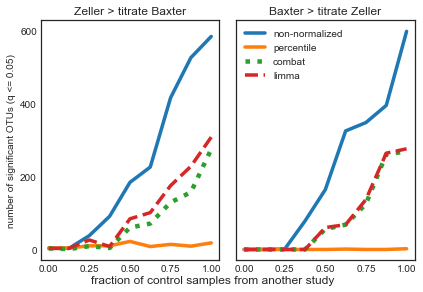

In [146]:
#plot zeller titrate baxter
titrate_ztob = []
sig_otus_ztob = []

for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_raw_zb[n][x]))
    sig_otus_ztob.append(np.mean(sig_diffs))
    titrate_ztob.append(x)
    
titrate_ztob = (np.divide(titrate_ztob,40))
sig_otus_percent_ztob = []
for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_percent_zb[n][x]))
    sig_otus_percent_ztob.append(np.mean(sig_diffs))

sig_otus_combat_ztob = []
for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_combat_zb[n][x]))
    sig_otus_combat_ztob.append(np.mean(sig_diffs))
    
sig_otus_limma_ztob = []
for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_limma_zb[n][x]))
    sig_otus_limma_ztob.append(np.mean(sig_diffs))
    
titrate_btoz = []
sig_otus_btoz = []

for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_raw_bz[n][x]))
    sig_otus_btoz.append(np.mean(sig_diffs))
    titrate_btoz.append(x)
    
titrate_btoz = (np.divide(titrate_btoz,40))
sig_otus_percent_btoz = []
for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_percent_bz[n][x]))
    sig_otus_percent_btoz.append(np.mean(sig_diffs))

sig_otus_combat_btoz = []
for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_combat_bz[n][x]))
    sig_otus_combat_btoz.append(np.mean(sig_diffs))
    
sig_otus_limma_btoz = []
for x in fractions:
    sig_diffs = []
    for n in range(5):
        sig_diffs.append(len(iter_limma_bz[n][x]))
    sig_otus_limma_btoz.append(np.mean(sig_diffs))

fig, (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey=True)  

ax1.plot(titrate_ztob,sig_otus_ztob,label = 'non-normalized',linewidth=3.5)
ax1.plot(titrate_ztob,sig_otus_percent_ztob, label = 'percentile-normalized',linewidth=3.5)
ax1.plot(titrate_ztob,sig_otus_combat_ztob, label = 'ComBat-normalized',linewidth=4.5,linestyle=':')
ax1.plot(titrate_ztob,sig_otus_limma_ztob, label = 'limma-normalized',linewidth=3.5,linestyle='--')

#ax1.set_ylabel('# significant otus (logscale)',color='k')
ax1.set_title('Zeller > titrate Baxter',fontsize=12)
#ax1.text(0.85, 110, 'A', fontsize=16)

ax2.plot(titrate_btoz,sig_otus_btoz,label = 'non-normalized',linewidth=3.5)
ax2.plot(titrate_btoz,sig_otus_percent_btoz, label = 'percentile',linewidth=3.5)
ax2.plot(titrate_btoz,sig_otus_combat_btoz, label = 'combat',linewidth=4.5,linestyle=':')
ax2.plot(titrate_btoz,sig_otus_limma_btoz, label = 'limma',linewidth=3.5,linestyle='--')

ax2.set_title('Baxter > titrate Zeller',fontsize=12)


ax1.locator_params(nbins=5, axis='y')
ax2.legend(loc=2,prop={'size':10})
#fig.text(0.001, 0.5, 'number of significant OTUs (q <= 0.05)', va='center', rotation='vertical',fontsize=12)
fig.text(0.5, 0.003, 'fraction of control samples from another study', ha='center',fontsize=12)
ax1.set_ylabel('number of significant OTUs (q <= 0.05)')
plt.tight_layout()
#plt.show()
plt.savefig('titrate_baxter_zeller_CRC_raw_vs_percentile_333cutoff_or_combat.pdf',dpi=300,format='pdf')

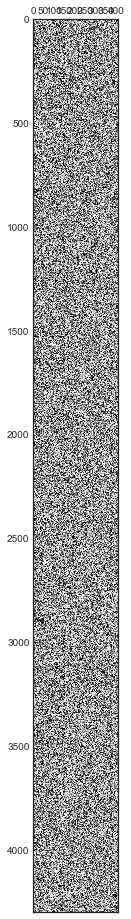

(4301, 161)
(4301, 247)


In [70]:
plt.matshow(pd.concat([crc_all_data_percentiles,h_all_data_percentiles],axis=1))

plt.show()
print(crc_all_data_percentiles.shape)
print(h_all_data_percentiles.shape)

In [147]:
###False positive analysis
###Split baxter controls into two groups randomly or look for sig diffs for raw vs. percentile, etc.

#test various combinations of controls vs. sig otus
#remove OTUs that occur in fewer than a quarter of samples

iterations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]
#iterations = [0, 1, 2, 3, 4, 5]

baxter_zeller_fp_raw_names = {}
baxter_zeller_fp_raw_fdr = {}
sig_frac_raw = []
sig_frac_fdr_raw = []

baxter_zeller_fp_percent_names = {}
baxter_zeller_fp_percent_fdr = {}
sig_frac_percent = []
sig_frac_fdr_percent = []

baxter_zeller_fp_combat_names = {}
baxter_zeller_fp_combat_fdr = {}
sig_frac_combat = []
sig_frac_fdr_combat = []

baxter_zeller_fp_limma_names = {}
baxter_zeller_fp_limma_fdr = {}
sig_frac_limma = []
sig_frac_fdr_limma = []

for x in iterations:
    control_col = baxter_h_data_raw.sample(n=40,axis=1).columns
#    case_col = list(set(baxter_h_data_raw.columns) - set(control_col))
    case_col = zeller_h_data_raw.sample(n=40,axis=1).columns

    healthy = baxter_h_data_raw[list(control_col)]
    crc = zeller_h_data_raw[list(case_col)]
    
    healthy_percent = baxter_h_data_percentiles[list(control_col)]
    crc_percent = zeller_h_data_percentiles[list(case_col)]
    
    healthy_combat = baxter_h_data_combat[list(control_col)]
    crc_combat = zeller_h_data_combat[list(case_col)]
    
    healthy_limma = baxter_h_data_limma[list(control_col)]
    crc_limma = zeller_h_data_limma[list(case_col)]
    
    pvals = []
    pvals_percent = []
    pvals_combat = []
    pvals_limma = []

    for i in range(crc.shape[0]):
        if crc.iloc[i,:].astype(bool).sum()/float(crc.shape[1]) >= 1/3.0 or healthy.iloc[i,:].astype(bool).sum()/float(healthy.shape[1]) >= 1/3.0:
            pvals.append(sp.stats.ranksums(crc.iloc[i,:],healthy.iloc[i,:])[1])
#        else:
#            pvals.append(np.random.random(1))
            
    for i in range(crc_percent.shape[0]):
        if crc.iloc[i,:].astype(bool).sum()/float(crc.shape[1]) >= 1/3.0 or healthy.iloc[i,:].astype(bool).sum()/float(healthy.shape[1]) >= 1/3.0:
            pvals_percent.append(sp.stats.ranksums(crc_percent.iloc[i,:],healthy_percent.iloc[i,:])[1])
#        else:
#            pvals_percent.append(np.random.random(1))
            
    for i in range(crc_combat.shape[0]):
        if crc.iloc[i,:].astype(bool).sum()/float(crc.shape[1]) >= 1/3.0 or healthy.iloc[i,:].astype(bool).sum()/float(healthy.shape[1]) >= 1/3.0:
            pvals_combat.append(sp.stats.ranksums(crc_combat.iloc[i,:],healthy_combat.iloc[i,:])[1])
#        else:
#            pvals_combat.append(np.random.random(1))
            
    for i in range(crc_limma.shape[0]):
        if crc.iloc[i,:].astype(bool).sum()/float(crc.shape[1]) >= 1/3.0 or healthy.iloc[i,:].astype(bool).sum()/float(healthy.shape[1]) >= 1/3.0:
            pvals_limma.append(sp.stats.ranksums(crc_limma.iloc[i,:],healthy_limma.iloc[i,:])[1])
#        else:
#            pvals_limma.append(np.random.random(1))
            
    pvals = np.array(pvals)
    pvals_fdr = sm.sandbox.stats.multicomp.multipletests(np.array(pvals),alpha=0.05,method='fdr_bh')[1]
    pvals_percent = np.array(pvals_percent)
    pvals_fdr_percent = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_percent),alpha=0.05,method='fdr_bh')[1]
    pvals_combat = np.array(pvals_combat)
    pvals_fdr_combat = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_combat),alpha=0.05,method='fdr_bh')[1]
    pvals_limma = np.array(pvals_limma)
    pvals_fdr_limma = sm.sandbox.stats.multicomp.multipletests(np.array(pvals_limma),alpha=0.05,method='fdr_bh')[1]
    
    names = []
    names_percent = []
    names_combat = []
    names_limma = []
    count= 0.0
    for z in pvals:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_raw.append(count/len(pvals))
    count= 0.0
    for z in pvals_percent:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_percent.append(count/len(pvals_percent))
    count= 0.0
    for z in pvals_combat:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_combat.append(count/len(pvals_combat))
    count= 0.0
    for z in pvals_limma:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_limma.append(count/len(pvals_limma))

    count= 0.0
    for z in pvals_fdr:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_fdr_raw.append(count/len(pvals_fdr))
    count= 0.0
    for z in pvals_fdr_percent:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_fdr_percent.append(count/len(pvals_fdr_percent))
    count= 0.0
    for z in pvals_fdr_combat:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_fdr_combat.append(count/len(pvals_fdr_combat))
    count= 0.0
    for z in pvals_fdr_limma:
        if z <= 0.05:
            count = count + 1.0
    sig_frac_fdr_limma.append(count/len(pvals_fdr_limma))
    

    


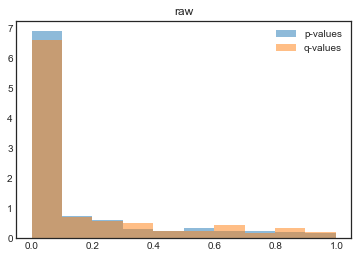

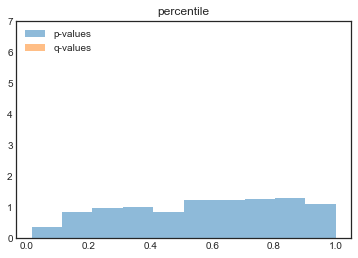

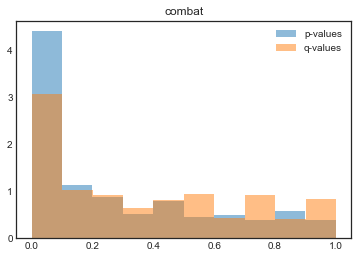

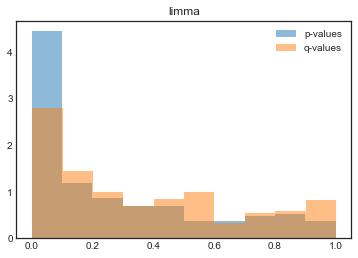

In [148]:
plt.hist(pvals,normed=1.0,label='p-values',alpha=0.5)
plt.hist(pvals_fdr,normed=1.0,label='q-values',alpha=0.5)
plt.legend()
plt.title('raw')
plt.show()
plt.hist(pvals_percent,normed=1.0,label='p-values',alpha=0.5)
plt.hist(pvals_fdr_percent,normed=1.0,label='q-values',alpha=0.5)
plt.ylim([0,7])
plt.legend()
plt.title('percentile')
plt.show()
plt.hist(pvals_combat,normed=1.0,label='p-values',alpha=0.5)
plt.hist(pvals_fdr_combat,normed=1.0,label='q-values',alpha=0.5)
plt.legend()
plt.title('combat')
plt.show()
plt.hist(pvals_limma,normed=1.0,label='p-values',alpha=0.5)
plt.hist(pvals_fdr_limma,normed=1.0,label='q-values',alpha=0.5)
plt.legend()
plt.title('limma')
plt.show()

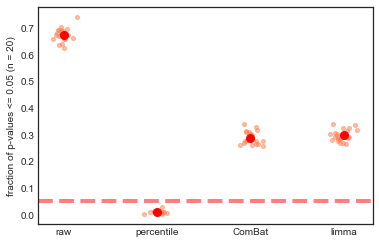

In [149]:
pval_data = [sig_frac_raw,sig_frac_percent,sig_frac_combat,sig_frac_limma]
fdr_data = [sig_frac_fdr_raw,sig_frac_fdr_percent,sig_frac_fdr_combat,sig_frac_fdr_limma]

for j in [1,2,3,4]:
    y = []
    x = []
    y = pval_data[j-1]
    y_med = np.mean(pval_data[j-1])
    x = np.random.normal(j, 0.07, len(y))
    plt.plot(x, y, 'k.',alpha=0.5,color='coral',markersize=8)
    plt.plot(j, y_med, 'o',markersize=8, alpha=1.0,color='r',lw=2,label = 'p-values')
    
#for j in [1,2,3,4]:
#    y = []
#    x = []
#    y = fdr_data[j-1]
#    y_med = np.mean(fdr_data[j-1])
#    x = np.random.normal(j, 0.07, len(y))
#    plt.plot(x, y, '.',alpha=0.5,color='steelblue',markersize=8)
#    plt.plot(j, y_med, 'o',markersize=8, alpha=1.0,color='b',lw=2,label = 'q-values')

plt.axhline(0.05,color='r',linestyle='--',linewidth=4,alpha=0.5)
plt.xticks([1,2,3,4],['raw','percentile','ComBat','limma'])
plt.ylabel('fraction of p-values <= 0.05 (n = 20)')
#plt.ylim([0.0,0.10])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
plt.savefig('../batch_effects_paper/false_positive_analysis_baxter_zeller_controls_one_filter.pdf',type='pdf',dpi=300)
#plt.show()

In [99]:
#print(sp.stats.ranksums(np.zeros(50),)[1])


In [18]:
#generate fake data for conceptual plot

control = numpy.random.lognormal(0.1,0.7,size=100)
case = numpy.random.lognormal(0.8,0.5,size=100)

control_percentiles = []
for i in range(len(control)):
    control_percentiles.append(sp.stats.percentileofscore(control, control[i],kind='mean'))
case_percentiles = []
for i in range(len(case)):
    case_percentiles.append(sp.stats.percentileofscore(control, case[i],kind='mean'))
    
control2 = numpy.random.lognormal(1.5,0.2,size=100)
case2 = numpy.random.lognormal(1.75,0.13,size=100)

control2_percentiles = []
for i in range(len(control2)):
    control2_percentiles.append(sp.stats.percentileofscore(control2, control2[i],kind='mean'))
case2_percentiles = []
for i in range(len(case2)):
    case2_percentiles.append(sp.stats.percentileofscore(control2, case2[i],kind='mean'))
    

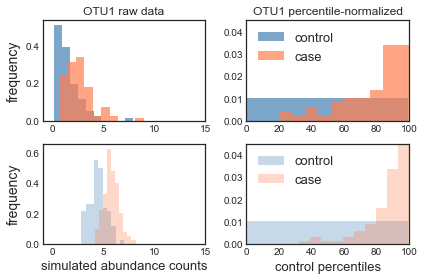

In [21]:
#plot conceptual figure


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

ax1.hist(control,normed=True,color='steelblue',alpha=0.7)
#ax1.set_xlabel('abundances')
ax1.set_ylabel('frequency',fontsize=14)
ax1.hist(case,normed=True,color='coral',alpha=0.7)
ax1.set_xlim([-1,15])
ax1.set_title('OTU1 raw data')
ax2.hist(control_percentiles,normed=True,color='steelblue',alpha=0.7,label='control')
#ax2.set_xlabel('control percentiles')
ax2.set_xlim([0,100])
ax2.set_ylim([0,0.045])
#ax2.set_ylabel('frequency')
ax2.hist(case_percentiles,normed=True,color='coral',alpha=0.7,label='case')
ax2.set_title('OTU1 percentile-normalized')

#ax1.get_shared_x_axes.join(ax1,ax2)

ax3.hist(control2,normed=True,color='steelblue',label='control',alpha=0.3)
ax3.set_xlabel('simulated abundance counts',fontsize=13)
ax3.set_ylabel('frequency',fontsize=14)
ax3.hist(case2,normed=True,color='coral',label='case',alpha=0.3)
ax3.set_xlim([-1,15])
ax4.hist(control2_percentiles,normed=True,color='steelblue',alpha=0.3,label='control')
ax4.set_xlabel('control percentiles',fontsize=13)
ax4.set_xlim([0,100])
ax4.set_ylim([0,0.045])
#ax4.set_ylabel('frequency')
ax4.hist(case2_percentiles,normed=True,color='coral',alpha=0.3,label='case')
ax2.legend(prop={'size': 13})
ax4.legend(prop={'size': 13})
plt.tight_layout()
plt.savefig('../batch_effects_paper/revision_figures/conceptual_fig_percentilenorm_pooling.pdf',dpi=300,format='pdf')
#plt.show()

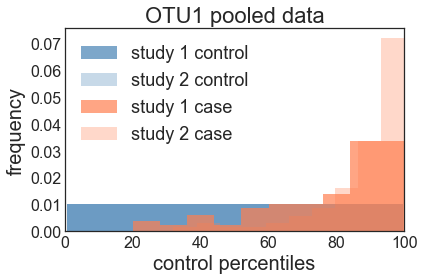

In [22]:
plt.hist(control_percentiles,normed=True,color='steelblue',alpha=0.7,label='study 1 control')
plt.hist(control2_percentiles,normed=True,color='steelblue',alpha=0.3, label='study 2 control')
plt.hist(case_percentiles,normed=True,color='coral',alpha=0.7,label='study 1 case')
plt.hist(case2_percentiles,normed=True,color='coral',alpha=0.3, label='study 2 case')
plt.legend(loc=2,fontsize=18)
plt.xlabel('control percentiles',fontsize=20)
plt.ylabel('frequency',fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim([0,100])
plt.title('OTU1 pooled data',fontsize=22)
plt.tight_layout()
plt.savefig('../batch_effects_paper/revision_figures/conceptual_fig_percentilenorm_pooled_studies.pdf',format='pdf',dpi=300)